# **Data Collection: Scraping Web Data**

We will be scraping data off of basketball-reference.com, which contains all historical NBA data. Specifically, we will be scraping season averages of every player from 1985 - 2022 (first year MIP was awared was 1985) to ultimately create dataframe with each players improvement from their previous season.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import time

We first need to find all player stats from 1986-2022.

In [2]:
#create an empty dataframe to append to
df_all_stats = pd.DataFrame()

#pull player data from 1986-2022
for i in range(1985, 2024):
  url = f'https://www.basketball-reference.com/leagues/NBA_{i}_per_game.html'
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')

  table = soup.find('table', {'id': 'per_game_stats'})
  df_years_stats = pd.read_html(str(table))[0]
  
  #clean data
  index_of_duplicates = df_years_stats[df_years_stats.duplicated(subset=["Player"]) == True].index.tolist() #get indexes of duplicate players
  df_years_stats = df_years_stats.drop(index = index_of_duplicates) #remove duplicate players
  df_years_stats = df_years_stats.drop(columns=["Tm", "Rk", "Pos"]) #drop irrelevant stats
  df_years_stats["year"] = i #add year column with year
  
  #add to dataframe with all stats
  df_all_stats = pd.concat([df_all_stats, df_years_stats])
  
  time.sleep(0.2)

#clean all data
df_all_stats["Player"] = df_all_stats["Player"].str.replace("*","")

df_all_stats

<ipython-input-2-8f1d92559b74>:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_all_stats["Player"] = df_all_stats["Player"].str.replace("*","")


,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,Kareem Abdul-Jabbar,37,79,79,33.3,9.2,15.3,.599,0.0,0.0,...,2.1,5.8,7.9,3.2,0.8,2.1,2.5,3.0,22.0,1985
1,Alvan Adams,30,82,69,26.0,5.8,11.2,.520,0.0,0.0,...,1.9,4.2,6.1,3.8,1.4,0.6,2.4,3.1,14.7,1985
2,Mark Aguirre,25,80,79,33.7,9.9,19.6,.506,0.3,1.1,...,2.4,3.6,6.0,3.1,0.8,0.3,3.2,3.1,25.7,1985
3,Danny Ainge,25,75,73,34.2,5.6,10.6,.529,0.2,0.7,...,1.0,2.6,3.6,5.3,1.6,0.1,2.0,3.0,12.9,1985
4,Chuck Aleksinas,25,74,4,15.1,2.2,4.6,.478,0.0,0.0,...,1.2,2.5,3.6,0.5,0.2,0.2,1.0,2.3,5.1,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Thaddeus Young,34,54,9,14.7,2.0,3.7,.545,0.1,0.6,...,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,2023
673,Trae Young,24,65,65,34.8,8.5,19.6,.433,2.2,6.6,...,0.8,2.3,3.1,10.1,1.1,0.1,4.1,1.5,26.8,2023
674,Omer Yurtseven,24,5,0,6.8,0.8,1.6,.500,0.0,0.2,...,0.8,0.8,1.6,0.0,0.2,0.2,0.2,1.2,1.8,2023
675,Cody Zeller,30,10,0,13.0,1.5,2.9,.517,0.0,0.1,...,1.6,1.9,3.5,0.6,0.2,0.4,0.8,2.3,4.7,2023


#**Data Manipulation and Cleaning: Assembling the Dataframe**

##**Data Cleaning**

We now need to change the data to reflect improvement from previous season rather than their current season averages.

To do so, we will first create a new dataframe that has each players prior year directly following it in the dataframe.

In [3]:
#get dataframe of current and previous years for each player in each year
all_years = list(range(2023, 1985, -1))

df_prior_and_current = pd.DataFrame()

for year in all_years:
  
  all_names_in_year = df_all_stats[df_all_stats["year"] == year]["Player"].tolist()

  for name in all_names_in_year:
    df_current = df_all_stats[df_all_stats["Player"] == name]
    df_winning_year = df_current[df_current["year"] == year]  
    df_prior_year= df_current[df_current["year"] == year - 1]

    df_prior_and_current = pd.concat([df_prior_and_current, df_winning_year, df_prior_year])
    
df_prior_and_current

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,Precious Achiuwa,23,47,11,21.4,3.4,7.2,.474,0.4,1.8,...,1.8,4.1,6.0,1.0,0.6,0.6,1.1,2.0,9.0,2023
0,Precious Achiuwa,22,73,28,23.6,3.6,8.3,.439,0.8,2.1,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2022
1,Steven Adams,29,42,42,27.0,3.7,6.3,.597,0.0,0.0,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,2023
1,Steven Adams,28,76,75,26.3,2.8,5.1,.547,0.0,0.0,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2022
2,Bam Adebayo,25,68,68,35.1,8.3,15.3,.543,0.0,0.2,...,2.4,6.9,9.4,3.3,1.2,0.9,2.6,2.9,21.1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,James Worthy,23,80,76,33.7,7.6,13.3,.572,0.0,0.1,...,2.1,4.3,6.4,2.5,1.1,0.8,2.5,2.5,17.6,1985
393,Danny Young,23,82,29,23.2,2.8,5.5,.506,0.3,0.9,...,0.4,1.1,1.5,3.7,1.3,0.1,1.1,1.4,6.9,1986
375,Danny Young,22,3,0,8.7,0.7,3.3,.200,0.0,0.3,...,0.0,1.0,1.0,0.7,1.0,0.0,0.7,0.7,1.3,1985
394,Michael Young,25,2,0,1.0,0.0,1.0,.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986


In [4]:
backup = df_prior_and_current #ONLY RUN ONCE

In [5]:
df_prior_and_current = backup #for testing purposes

In the new dataframe, there is an issue where the intended column names was included as data. We need to remove all instances of this.

In [6]:
#rename indexes to correct order
index_list = list(range(0, len(df_prior_and_current.index)))
df_prior_and_current = df_prior_and_current.set_axis(index_list, axis='index')

#iterate through dataframe deleting all instances of "Player"
i = len(df_prior_and_current.index) - 1 #start with largest index to avoid shifting issues

while (i > -1):
  
  name = df_prior_and_current.iloc[i]["Player"]
  if (name == "Player"):
    df_prior_and_current = df_prior_and_current.drop(index = i)
  i = i - 1

Becase in every season there are players who are in their first year (rookies) or did not play the previous year, we need to remove these players. 

In [7]:
#rename indexes to correct order
index_list = list(range(0, len(df_prior_and_current.index)))
df_prior_and_current = df_prior_and_current.set_axis(index_list, axis='index')

#iterate through dataframe deleting all rookies, etc.
i = len(df_prior_and_current.index) - 1 #start with largest index to avoid shifting issues

while (i > -1):
  name1 = df_prior_and_current.iloc[i]["Player"]
  name2 = df_prior_and_current.iloc[i - 1]["Player"]
  
  if (name1 != name2):
    df_prior_and_current = df_prior_and_current.drop(index = i)
    i = i - 1 #so there isn't an off by one error
  else:
    i = i - 2

We also need to get rid of all instances of NaN, as some statistics are NaN. For example, in the earlier years, less people shot threes meaning there was a good amount of players who never shot a three, let alone make one, in a given year.

In [8]:
#get rid of all NaN in dataframe
df_prior_and_current = df_prior_and_current.fillna(0)

##**Data Manipulation**

We need to first turn all quantitative variables to float instead of string.

In [9]:
#turn all columns to quantitative variables

quant_columns = ["G", "GS",	"MP",	"FG",	"FGA",	"FG%",	"3P",	"3PA", "3P%", "2P",	"2PA",	"2P%",	"eFG%",	"FT",	"FTA",	"FT%",	"ORB",	"DRB",	"TRB",	"AST",	"STL",	"BLK",	"TOV",	"PF",	"PTS"]
df_prior_and_current[quant_columns] = df_prior_and_current[quant_columns].astype(float)


Since we will be temporarily be removing the categorical variables, we need to save their values.

In [10]:
#rename indexes to correct order
index_list = list(range(0, len(df_prior_and_current.index)))
df_prior_and_current = df_prior_and_current.set_axis(index_list, axis='index')

#get list of all players to eventually add back to dataframe
players = []

for i in range (0, len(df_prior_and_current.index) - 1, 2):
  players.append(df_prior_and_current["Player"][i])

#get list of years to eventually add back to dataframe
years = []

for i in range (0, len(df_prior_and_current.index) - 1, 2):
  years.append(df_prior_and_current["year"][i])

Subtract current year by prior year to get improvement in each statistical category.

In [11]:
#get dataframe of improvement from previous year of each player

df_improvement = pd.DataFrame()

for i in range(0, len(df_prior_and_current.index), 2):
  
  current_year = df_prior_and_current[quant_columns].iloc[i] #double bracket to get dataframe back
  previous_year = df_prior_and_current[quant_columns].iloc[i+1]

  df_dif = current_year - previous_year
  df_dif = pd.DataFrame(df_dif).transpose() #turn series to Dataframe and take transpose to fix axis

  df_improvement = pd.concat([df_improvement, df_dif])

df_improvement

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,-26.0,-17.0,-2.2,-0.2,-1.1,0.035,-0.4,-0.3,-0.112,0.1,...,0.103,-0.2,-0.4,-0.5,-0.1,0.1,0.0,-0.1,-0.1,-0.1
0,-34.0,-33.0,0.7,0.9,1.2,0.050,0.0,0.0,0.000,0.9,...,-0.179,0.5,1.1,1.5,-1.1,0.0,0.3,0.4,0.3,1.7
0,12.0,12.0,2.5,1.0,2.3,-0.014,0.0,0.1,0.083,1.0,...,0.050,0.0,-0.7,-0.7,-0.1,-0.2,0.1,0.0,-0.2,2.0
0,36.0,18.0,10.7,1.6,3.0,0.067,1.1,2.1,0.223,0.5,...,0.111,0.1,1.9,2.1,0.6,0.4,0.4,0.2,0.8,5.2
0,-15.0,-18.0,-7.0,-1.5,-5.3,0.078,-0.6,-2.5,0.069,-1.0,...,-0.076,-0.3,-0.8,-1.1,-0.4,-0.1,0.0,-0.4,-0.1,-4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3.0,48.0,4.2,-0.5,-0.5,-0.021,-0.1,-0.1,-0.084,-0.4,...,0.037,0.3,-0.1,0.3,0.6,-0.4,0.1,0.0,-0.1,-1.4
0,-7.0,-17.0,-4.5,-1.1,-0.3,-0.059,0.1,0.2,0.174,-1.1,...,0.003,0.0,-0.7,-0.6,1.2,-0.1,0.2,0.2,0.3,-2.2
0,-5.0,-3.0,-1.0,0.8,1.2,0.007,0.0,0.1,0.000,0.8,...,-0.005,-0.3,-1.0,-1.2,0.2,0.0,0.2,-0.5,0.1,2.4
0,79.0,29.0,14.5,2.1,2.2,0.306,0.3,0.6,0.324,1.8,...,0.849,0.4,0.1,0.5,3.0,0.3,0.1,0.4,0.7,5.6


In [12]:
backup2 = df_improvement #ONLY RUN ONCE

In [13]:
df_improvement = backup2 #for troubleshooting

We will now add the columns we removed back and rename all columns to reflect that they are the difference of the current year and prior year.

In [14]:
#rename columns
new_columns = {}
for col in quant_columns:
    new_columns[col] = col + '_diff' #rename columns

df_improvement = df_improvement.rename(columns=new_columns)

#add back name
df_improvement["Player"] = df_improvement.insert(0, "Player", players)
df_improvement["Player"] = players

#add back year
df_improvement["year"] = df_improvement.insert(1, "year", years)
df_improvement["year"] = years

#rename indexes to correct order
index_list = list(range(0, len(df_improvement.index)))
df_improvement = df_improvement.set_axis(index_list, axis='index')

We now need to add a column that tells us whether the player was a MIP nominee in that given year.

In [15]:
df_all = pd.merge(df_all_stats, df_improvement, on=['Player', 'year'])
df_all

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%_diff,ORB_diff,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff
0,Kareem Abdul-Jabbar,38,79,79,33.3,9.6,16.9,.564,0.0,0.0,...,0.033,-0.4,-1.4,-1.8,0.3,0.0,-0.5,0.1,0.1,1.4
1,Alvan Adams,31,78,45,25.7,4.4,8.7,.502,0.0,0.0,...,-0.100,0.0,0.0,0.0,0.4,-0.1,0.0,0.2,0.4,-3.9
2,Mark Aguirre,26,74,73,33.8,9.0,17.9,.503,0.2,0.8,...,-0.054,0.0,0.0,0.0,1.5,0.0,-0.1,0.2,0.0,-3.1
3,Danny Ainge,26,80,78,30.1,4.4,8.8,.504,0.3,0.9,...,0.036,-0.4,-0.2,-0.7,-0.2,-0.4,0.0,-0.4,-0.4,-2.2
4,Ron Anderson,27,77,30,21.8,4.0,8.2,.494,0.0,0.1,...,-0.151,0.6,0.5,1.2,1.0,0.4,-0.1,0.2,0.5,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,Thaddeus Young,34,54,9,14.7,2.0,3.7,.545,0.1,0.6,...,0.223,-0.2,-0.7,-0.9,-0.6,0.0,-0.2,-0.2,0.0,-1.8
13409,Trae Young,24,65,65,34.8,8.5,19.6,.433,2.2,6.6,...,-0.017,0.1,-0.8,-0.6,0.4,0.2,0.0,0.1,-0.2,-1.6
13410,Omer Yurtseven,24,5,0,6.8,0.8,1.6,.500,0.0,0.2,...,-0.123,-0.7,-2.9,-3.7,-0.9,-0.1,-0.2,-0.5,-0.3,-3.5
13411,Cody Zeller,30,10,0,13.0,1.5,2.9,.517,0.0,0.1,...,-0.037,-0.3,-0.9,-1.1,-0.2,-0.1,0.2,0.1,0.2,-0.5


We will first make a data frame of all the nominees for the MIP Award from '86 to '23.

In [16]:
df_improvement["Nominee"] = [False for i in range(13413)]
df_improvement["Share"] = [0 for i in range(13413)]
df_improvement

,Player,year,G_diff,GS_diff,MP_diff,FG_diff,FGA_diff,FG%_diff,3P_diff,3PA_diff,...,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff,Nominee,Share
0,Precious Achiuwa,2023,-26.0,-17.0,-2.2,-0.2,-1.1,0.035,-0.4,-0.3,...,-0.4,-0.5,-0.1,0.1,0.0,-0.1,-0.1,-0.1,False,0
1,Steven Adams,2023,-34.0,-33.0,0.7,0.9,1.2,0.050,0.0,0.0,...,1.1,1.5,-1.1,0.0,0.3,0.4,0.3,1.7,False,0
2,Bam Adebayo,2023,12.0,12.0,2.5,1.0,2.3,-0.014,0.0,0.1,...,-0.7,-0.7,-0.1,-0.2,0.1,0.0,-0.2,2.0,False,0
3,Santi Aldama,2023,36.0,18.0,10.7,1.6,3.0,0.067,1.1,2.1,...,1.9,2.1,0.6,0.4,0.4,0.2,0.8,5.2,False,0
4,Nickeil Alexander-Walker,2023,-15.0,-18.0,-7.0,-1.5,-5.3,0.078,-0.6,-2.5,...,-0.8,-1.1,-0.4,-0.1,0.0,-0.4,-0.1,-4.1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,Mike Woodson,1986,3.0,48.0,4.2,-0.5,-0.5,-0.021,-0.1,-0.1,...,-0.1,0.3,0.6,-0.4,0.1,0.0,-0.1,-1.4,False,0
13409,Orlando Woolridge,1986,-7.0,-17.0,-4.5,-1.1,-0.3,-0.059,0.1,0.2,...,-0.7,-0.6,1.2,-0.1,0.2,0.2,0.3,-2.2,False,0
13410,James Worthy,1986,-5.0,-3.0,-1.0,0.8,1.2,0.007,0.0,0.1,...,-1.0,-1.2,0.2,0.0,0.2,-0.5,0.1,2.4,False,0
13411,Danny Young,1986,79.0,29.0,14.5,2.1,2.2,0.306,0.3,0.6,...,0.1,0.5,3.0,0.3,0.1,0.4,0.7,5.6,False,0


In [17]:
from google.colab import drive
drive.mount('/content/drive')

MIP = pd.read_csv("/content/drive/My Drive/MIP Nominations/1985-1986 MIP Nominees.txt")
MIP["year"] = 1986

for i in range(1986, 2022):
  df = pd.read_csv("/content/drive/My Drive/MIP Nominations/" + str(i) + "-" + str(i+1) + " MIP Nominees.txt")
  df["year"] = i+1 
  MIP = pd.concat([MIP, df])

MIP = MIP.drop(columns = ["-9999", "Tm", "Age"])
MIP 

Mounted at /content/drive


,Rank,Player,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,year
0,1,Alvin Robertson,30.0,30.0,78,0.385,82,35.1,17.0,6.3,5.5,3.7,0.5,0.514,0.276,0.795,8.6,0.143,1986
1,2,Charles Barkley,18.5,18.5,78,0.237,80,36.9,20.0,12.8,3.9,2.2,1.6,0.572,0.227,0.685,10.8,0.176,1986
2,3,Kevin Willis,8.0,8.0,78,0.103,82,28.0,12.3,8.6,0.5,0.8,0.5,0.517,0.000,0.654,4.7,0.099,1986
3,4,Dominique Wilkins,6.5,6.5,78,0.083,78,39.1,30.3,7.9,2.6,1.8,0.6,0.468,0.186,0.818,10.8,0.170,1986
0,1,Dale Ellis,33.0,33.0,78,0.423,82,37.5,24.9,5.5,2.9,1.3,0.4,0.516,0.358,0.787,9.3,0.145,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,8,Anfernee Simons,0.0,13.0,500,0.026,57,29.5,17.3,2.6,3.9,0.5,0.1,0.443,0.405,0.888,1.9,0.055,2022
8,9,Robert Williams,0.0,4.0,500,0.008,61,29.6,10.0,9.6,2.0,0.9,2.2,0.736,0.000,0.722,9.9,0.262,2022
9,10,Jaren Jackson Jr.,0.0,3.0,500,0.006,78,27.3,16.3,5.8,1.1,0.9,2.3,0.415,0.319,0.823,5.4,0.121,2022
10,11,Jalen Brunson,0.0,2.0,500,0.004,79,31.9,16.3,3.9,4.8,0.8,0.0,0.502,0.373,0.840,7.5,0.143,2022


Add to differential dataframe

In [18]:
# for just the year and the player
nominees = MIP[["Player", "year", "Share"]]
nominees = nominees.reset_index().drop(columns = ["index"])

for i in range(795):
  df_all.loc[(df_all["Player"] == nominees.iloc[i]["Player"]) & (df_all["year"] == nominees.iloc[i]["year"]), "Nominee"] = True
  df_all.loc[(df_all["Player"] == nominees.iloc[i]["Player"]) & (df_all["year"] == nominees.iloc[i]["year"]), "Share"] = nominees.iloc[i]["Share"]

df_all['Nominee'] = df_all['Nominee'].fillna(False)
df_all['Share'] = df_all['Share'].fillna(0)

In [19]:
df_all

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff,Nominee,Share
0,Kareem Abdul-Jabbar,38,79,79,33.3,9.6,16.9,.564,0.0,0.0,...,-1.4,-1.8,0.3,0.0,-0.5,0.1,0.1,1.4,False,0.0
1,Alvan Adams,31,78,45,25.7,4.4,8.7,.502,0.0,0.0,...,0.0,0.0,0.4,-0.1,0.0,0.2,0.4,-3.9,False,0.0
2,Mark Aguirre,26,74,73,33.8,9.0,17.9,.503,0.2,0.8,...,0.0,0.0,1.5,0.0,-0.1,0.2,0.0,-3.1,False,0.0
3,Danny Ainge,26,80,78,30.1,4.4,8.8,.504,0.3,0.9,...,-0.2,-0.7,-0.2,-0.4,0.0,-0.4,-0.4,-2.2,False,0.0
4,Ron Anderson,27,77,30,21.8,4.0,8.2,.494,0.0,0.1,...,0.5,1.2,1.0,0.4,-0.1,0.2,0.5,3.4,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,Thaddeus Young,34,54,9,14.7,2.0,3.7,.545,0.1,0.6,...,-0.7,-0.9,-0.6,0.0,-0.2,-0.2,0.0,-1.8,False,0.0
13409,Trae Young,24,65,65,34.8,8.5,19.6,.433,2.2,6.6,...,-0.8,-0.6,0.4,0.2,0.0,0.1,-0.2,-1.6,False,0.0
13410,Omer Yurtseven,24,5,0,6.8,0.8,1.6,.500,0.0,0.2,...,-2.9,-3.7,-0.9,-0.1,-0.2,-0.5,-0.3,-3.5,False,0.0
13411,Cody Zeller,30,10,0,13.0,1.5,2.9,.517,0.0,0.1,...,-0.9,-1.1,-0.2,-0.1,0.2,0.1,0.2,-0.5,False,0.0


In [20]:
df_all_not_nominees = df_all[df_all["Nominee"] == False]
df_all_not_nominees

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff,Nominee,Share
0,Kareem Abdul-Jabbar,38,79,79,33.3,9.6,16.9,.564,0.0,0.0,...,-1.4,-1.8,0.3,0.0,-0.5,0.1,0.1,1.4,False,0.0
1,Alvan Adams,31,78,45,25.7,4.4,8.7,.502,0.0,0.0,...,0.0,0.0,0.4,-0.1,0.0,0.2,0.4,-3.9,False,0.0
2,Mark Aguirre,26,74,73,33.8,9.0,17.9,.503,0.2,0.8,...,0.0,0.0,1.5,0.0,-0.1,0.2,0.0,-3.1,False,0.0
3,Danny Ainge,26,80,78,30.1,4.4,8.8,.504,0.3,0.9,...,-0.2,-0.7,-0.2,-0.4,0.0,-0.4,-0.4,-2.2,False,0.0
4,Ron Anderson,27,77,30,21.8,4.0,8.2,.494,0.0,0.1,...,0.5,1.2,1.0,0.4,-0.1,0.2,0.5,3.4,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,Thaddeus Young,34,54,9,14.7,2.0,3.7,.545,0.1,0.6,...,-0.7,-0.9,-0.6,0.0,-0.2,-0.2,0.0,-1.8,False,0.0
13409,Trae Young,24,65,65,34.8,8.5,19.6,.433,2.2,6.6,...,-0.8,-0.6,0.4,0.2,0.0,0.1,-0.2,-1.6,False,0.0
13410,Omer Yurtseven,24,5,0,6.8,0.8,1.6,.500,0.0,0.2,...,-2.9,-3.7,-0.9,-0.1,-0.2,-0.5,-0.3,-3.5,False,0.0
13411,Cody Zeller,30,10,0,13.0,1.5,2.9,.517,0.0,0.1,...,-0.9,-1.1,-0.2,-0.1,0.2,0.1,0.2,-0.5,False,0.0


In [21]:
df_all_nominees = df_all[df_all["Nominee"] == True]
df_all_nominees

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff,Nominee,Share
11,Charles Barkley,22,80,80,36.9,7.4,13.0,.572,0.2,0.9,...,3.1,4.2,2.0,1.0,0.6,1.9,0.5,6.0,True,0.237
175,Alvin Robertson,23,82,82,35.1,6.9,13.3,.514,0.1,0.4,...,2.1,2.9,2.0,2.1,0.2,1.0,0.9,7.8,True,0.385
235,Dominique Wilkins,26,78,78,39.1,11.4,24.3,.468,0.2,0.9,...,0.5,1.0,0.1,0.1,-0.1,0.4,0.1,2.9,True,0.083
243,Kevin Willis,23,82,59,28.0,5.1,9.9,.517,0.0,0.1,...,1.4,2.2,0.1,0.4,-0.1,0.9,0.8,3.0,True,0.103
263,Charles Barkley,23,68,62,40.3,8.2,13.8,.594,0.3,1.5,...,0.5,1.8,1.0,-0.4,-0.1,0.3,-0.5,3.0,True,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12842,Dejounte Murray,25,68,68,34.8,8.4,18.3,.462,1.4,4.3,...,0.9,1.2,3.8,0.5,0.2,0.9,0.0,5.4,True,0.366
12883,Jordan Poole,22,76,51,30.0,6.2,13.9,.448,2.8,7.6,...,1.5,1.6,2.1,0.3,0.1,1.5,1.0,6.5,True,0.262
12920,Anfernee Simons,22,57,30,29.5,6.2,14.0,.443,3.1,7.8,...,0.2,0.4,2.5,0.2,0.0,1.3,0.4,9.5,True,0.026
12930,Max Strus,25,68,16,23.3,3.7,8.3,.441,2.7,6.5,...,1.7,1.9,0.8,0.1,0.1,0.6,0.6,4.5,True,0.002


# **Data Exploration: Looking at data trends in the MIP Award**

The MIP Award has always been decided by a panel of sportswriters and broadcasters throughout the United States and Canada. Each member of the voting panel casts a vote for first to fifth place selections. However, it can be difficult to see exactly what criteria they are looking.

Let's analyze the different trends in the nominations to see what constitues the award giving prccess. 

###**Terminology**

We will first explain important terminology required to understand the data. The six variables we will be looking at extensively are the six "main" statistical categories in basketball.


1. **MP** - Minutes Played, or the average amount of time the player was on the court each game in a given season
2. **PTS** - Points, or the average amount of points the player scored each game in a given season
3. **TRB** - Total Rebounds, or the average amount of rebounds the player grabbed each game in a given season (this includes both offensive and defensive)
4. **AST** - Asists, or the average amount of asists the player had each game
5. **STL** - Steals, or the average amount of steals the player had each game in a given season
6. **BLK** - Blocks, or the average amount of blocks the player had each game in a given season





###**League Comparison**: 

We will analyze the MIP Candidates as a whole in comparison to the league.

**Motive**: We are curious to see where the nominees compare to the rest the league in each major statistical category. To do so we will create pairplots to not only view how they compare to the league, but also isolate two variables at a time.

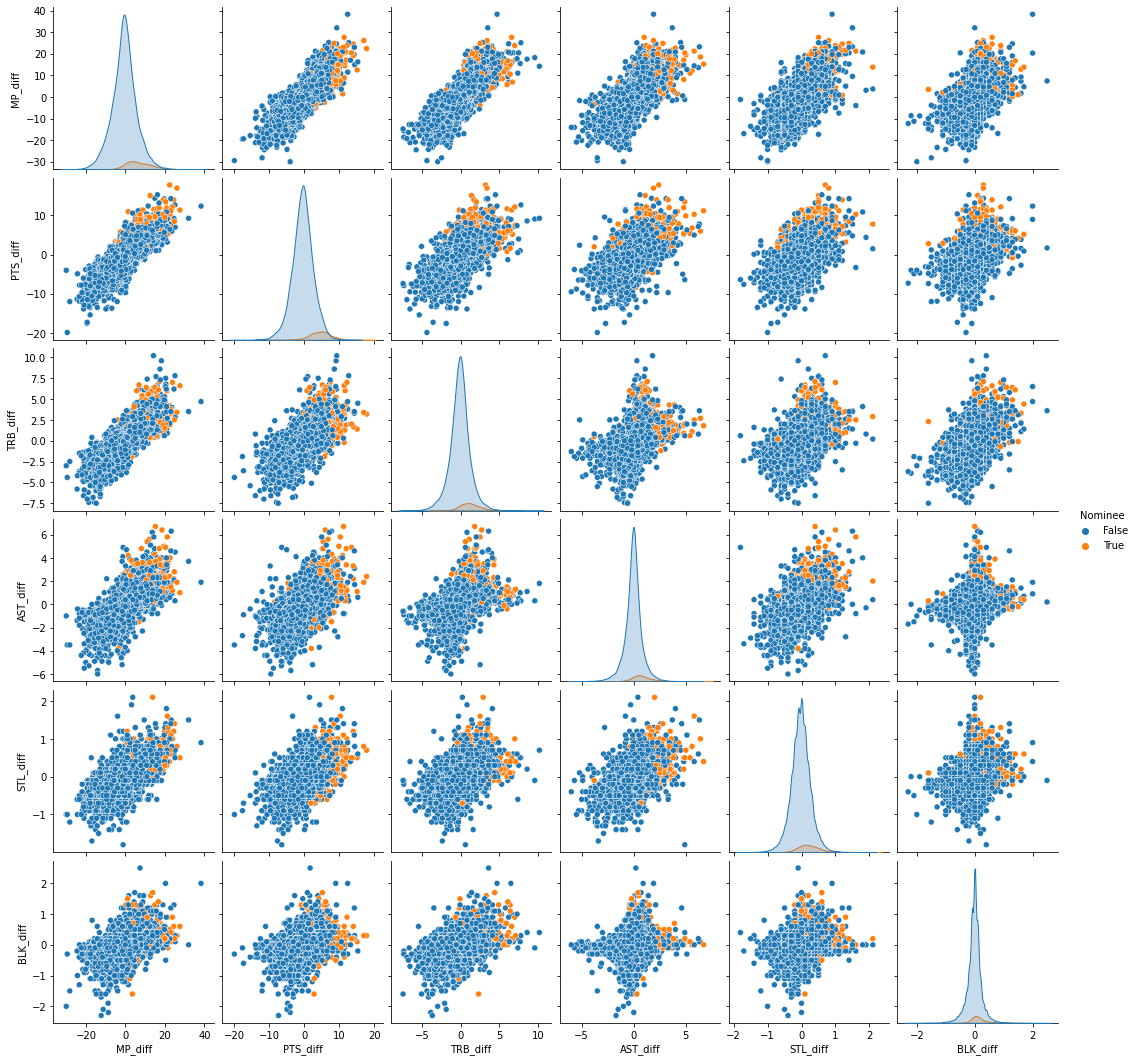

In [22]:
import seaborn as sns
sns.pairplot(df_all[['MP_diff', 'PTS_diff', 'TRB_diff', 'AST_diff', 'STL_diff', 'BLK_diff', 'Nominee']], hue='Nominee')

**Analysis**: Looking at each plot, we can see that the nominees consistently lie close together. However, we are also looking for graphs where we see that the grouping is towards the top-right corner, indicating both variables are significant. With some variables, you see the cluster "blended in" with the rest of the leage, such as BLOCKS and STEALS. In contrast, with MINUTES PLAYED and POINTS, the cluster is very distinct from the rest of the league. This may indicate that MINUTES PLAYED AND POINTS play a much more influential role in voting.

**Motive**: We want to look further into the relationship of each statistic with the MIP award. We will now look only into the nominees and the average change in each statistical category.

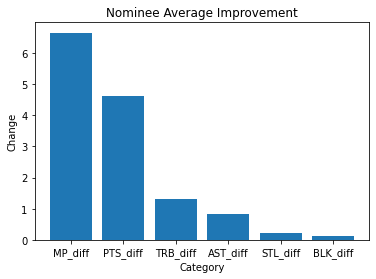


Average Minute Change: 6.65158831003812
Average Point Change: 4.633036848792885
Average Rebound Change: 1.3095298602287164
Average Asist Change: 0.8362134688691233
Average Steal Change: 0.22223634053367217
Average Block Change: 0.13926302414231256


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

labels = ['MP_diff', 'PTS_diff', 'TRB_diff', 'AST_diff', 'STL_diff', 'BLK_diff']
data= []

for label in labels:
  data.append(df_all_nominees[label].mean())


plt.bar(labels, data)
plt.title("Nominee Average Improvement")
plt.xlabel("Category")
plt.ylabel("Change")
plt.show()

print("")
print("Average Minute Change: " + str(df_all_nominees["MP_diff"].mean()))
print("Average Point Change: " + str(df_all_nominees["PTS_diff"].mean()))
print("Average Rebound Change: " + str(df_all_nominees["TRB_diff"].mean()))
print("Average Asist Change: " + str(df_all_nominees["AST_diff"].mean()))
print("Average Steal Change: " + str(df_all_nominees["STL_diff"].mean()))
print("Average Block Change: " + str(df_all_nominees["BLK_diff"].mean()))

**Analysis**: Our analysis from the previous graph is confirmed. It seems as if MINUTES PLAYED and POINTS are the often the biggest areas of improvement amongst candidates. It is important to note that there is a potential concern that we are working with differences instead of ratios. However, we feel such a concern is irrelevant as

1.   Categories with a low change such as BLOCKS would still always be the lowest with ratios. For example, the average amount of blocks across the league is around 1. An increase of 0.1 is just a 10% a change. Now lets look at POINTS. With a change of about 4.6, a change less than 10% would mean that the league average in points would have to be 46 points. The highest a player has ever averaged across their career is Michael Jordan with 30.12 points. The highest ever in a single season in the time frame of MIP is Michael Jordan with 37.1 points.
2.   We are working with a large enough data set where even if there are a few players whose improvement may be better measured by ratio, the average would still be roughly the same.

**Motive**: We now want to see the averages in relation to the rest of the league to truly contexualize the improvement of the candidates.

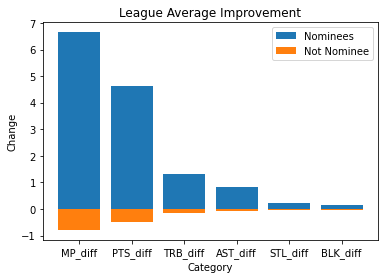


Nominee
Average Minute Change: 6.65158831003812
Average Point Change: 4.633036848792885
Average Rebound Change: 1.3095298602287164
Average Asist Change: 0.8362134688691233
Average Steal Change: 0.22223634053367217
Average Block Change: 0.13926302414231256

Not Nominee
Average Minute Change: -0.792222398225883
Average Point Change: -0.4918501504831301
Average Rebound Change: -0.16450974180262948
Average Asist Change: -0.07451290986852527
Average Steal Change: -0.03245683510217012
Average Block Change: -0.02674639632504356


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

labels = ['MP_diff', 'PTS_diff', 'TRB_diff', 'AST_diff', 'STL_diff', 'BLK_diff']
data_nominee= []
data_not = []

for label in labels:
  data_nominee.append(df_all_nominees[label].mean())
  data_not.append(df_all_not_nominees[label].mean())


plt.bar(labels, data_nominee, label = 'Nominees')
plt.bar(labels, data_not, label = 'Not Nominee')
plt.title("League Average Improvement")
plt.xlabel("Category")
plt.ylabel("Change")
plt.legend()
plt.show()

print("")
print("Nominee")
print("Average Minute Change: " + str(df_all_nominees["MP_diff"].mean()))
print("Average Point Change: " + str(df_all_nominees["PTS_diff"].mean()))
print("Average Rebound Change: " + str(df_all_nominees["TRB_diff"].mean()))
print("Average Asist Change: " + str(df_all_nominees["AST_diff"].mean()))
print("Average Steal Change: " + str(df_all_nominees["STL_diff"].mean()))
print("Average Block Change: " + str(df_all_nominees["BLK_diff"].mean()))
print("")
print("Not Nominee")
print("Average Minute Change: " + str(df_all_not_nominees["MP_diff"].mean()))
print("Average Point Change: " + str(df_all_not_nominees["PTS_diff"].mean()))
print("Average Rebound Change: " + str(df_all_not_nominees["TRB_diff"].mean()))
print("Average Asist Change: " + str(df_all_not_nominees["AST_diff"].mean()))
print("Average Steal Change: " + str(df_all_not_nominees["STL_diff"].mean()))
print("Average Block Change: " + str(df_all_not_nominees["BLK_diff"].mean()))

**Analysis**: Compared to the rest of the league, the nominees not only outperform in every statistical category, but the league actually regresses while the nominess improve. However, there is a concern that including non-nominees who improve in a group that includes regressing players to be not good practice. We will address this in the next graph.

**Motive**: We now want to see the averages in relation to the rest of the league's players who also improved to truly contexualize the improvement of the candidates.

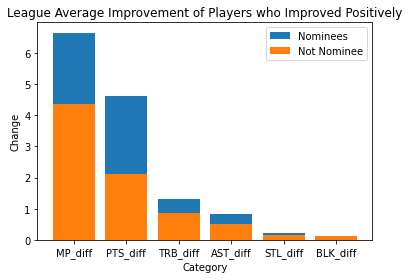

In [25]:

labels = ['MP_diff', 'PTS_diff', 'TRB_diff', 'AST_diff', 'STL_diff', 'BLK_diff']
data_nominee= []
data_not = []

for label in labels:
  data_nominee.append(df_all_nominees[label].mean())

  temp = df_all_not_nominees[df_all_not_nominees[label] >= 0]
  data_not.append(temp[label].mean())


plt.bar(labels, data_nominee, label = 'Nominees')
plt.bar(labels, data_not, label = 'Not Nominee')
plt.title("League Average Improvement of Players who Improved Positively")
plt.xlabel("Category")
plt.ylabel("Change")
plt.legend()
plt.show()

**Analysis**: As seen by the graph, even when considering the players who improved but were not nominated, the nominees still outperform in almost every statistical category. However, it is clear that MINUTES PLAYED and POINTS is where that distinction is truly made.

###**Threshold Identification**:

We will now determine the threshold in each respective category to be considered. That is a player that improves from 16-20ppg is naturally more likely to be considered than 0-4ppg. We need to find that threshold (we will now be working with the norminal dataframe instead of the differential dataframe).

In [26]:
df_all_stats["Nominee"] = False
nominees = MIP[["Player", "year"]]
nominees = nominees.reset_index().drop(columns = ["index"])

for i in range(795):
  df_all_stats.loc[(df_all_stats["Player"] == nominees.iloc[i]["Player"]) & (df_all_stats["year"] == nominees.iloc[i]["year"]), "Nominee"] = True

In [27]:
df_all_stats_nominees = df_all_stats[df_all_stats["Nominee"] == True]
df_all_stats_nominees = df_all_stats_nominees[['GS', 'Player', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'Nominee', 'year']]

quant = ['GS', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK']

df_all_stats_nominees.fillna(0)
df_all_stats_nominees[quant] = df_all_stats_nominees[quant].astype(float)

**Motive**: We will find the minimum threshold for each of the six major statistical categories.

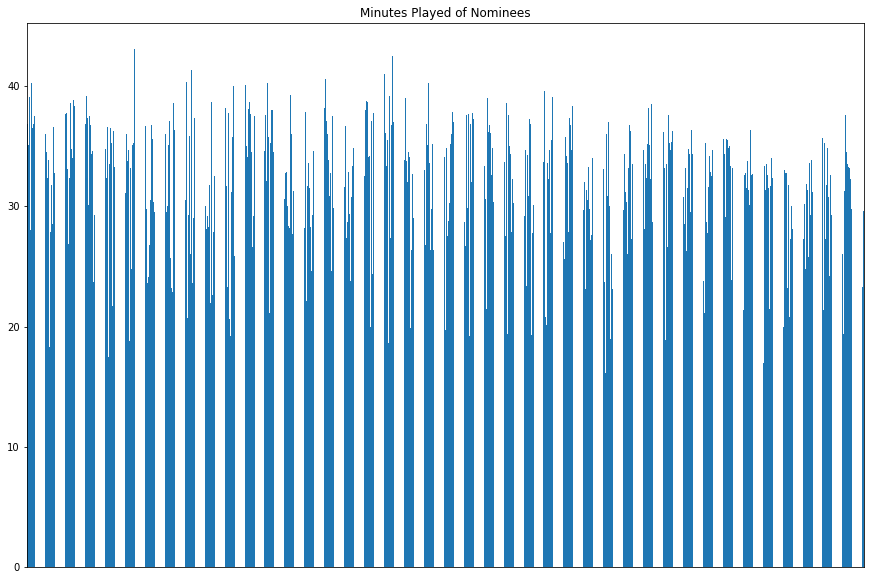


Min minutes played:15.4
Max minutes played:43.1
Avg minutes played:32.004025157232704

Q1: 29.05
Q3: 35.8
IQR: 6.7499999999999964

Outliers: 18.925000000000004


In [28]:
import matplotlib.pyplot as plt
import numpy as np

df_all_stats_nominees["MP"].plot.bar(figsize=(15,10))

# Remove x-labels
plt.xticks([])
plt.title("Minutes Played of Nominees")
plt.show()

print("")
print('Min minutes played:' + str(min(df_all_stats_nominees["MP"])))
print('Max minutes played:' + str(max(df_all_stats_nominees["MP"])))
print('Avg minutes played:' + str((df_all_stats_nominees["MP"]).mean()))

q3, q1 = np.percentile(df_all_stats_nominees['MP'], [75 ,25])
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)
print("")
print("Q1: " + str(q1))
print("Q3: " + str(q3))
print("IQR: " + str(IQR))

print("")
print("Outliers: " + str(lower_fence))

In [29]:
df_all_stats_nominees[df_all_stats_nominees['MP'] < 19]

,GS,Player,MP,PTS,AST,TRB,STL,BLK,Nominee,year
19,1.0,John Battle,18.3,10.6,2.4,1.7,0.5,0.1,True,1988
381,7.0,Derek Smith,18.7,8.9,1.5,2.3,0.5,0.3,True,1990
0,52.0,Alaa Abdelnaby,17.5,7.7,0.4,4.5,0.3,0.3,True,1993
121,1.0,Bison Dele,18.8,8.0,0.6,5.6,0.6,1.1,True,1994
144,45.0,DeSagana Diop,18.6,2.3,0.3,4.6,0.5,1.8,True,2006
393,0.0,Steve Novak,18.9,8.8,0.2,1.9,0.3,0.2,True,2012
564,0.0,Brandan Wright,16.1,6.9,0.3,3.6,0.4,1.3,True,2012
405,2.0,Patty Mills,18.9,10.2,1.8,2.1,0.8,0.1,True,2014
362,7.0,Meyers Leonard,15.4,5.9,0.6,4.5,0.2,0.3,True,2015
244,3.0,Montrezl Harrell,17.0,11.0,1.0,4.0,0.5,0.7,True,2018


**Analysis**: Most of the players who were nominated lied in the range of 29 minutes and 36 minutes. There were several players who were outliers though, with less than 19 minutes. We can assume that there improvement must have been in their impact rather than time on the floor.

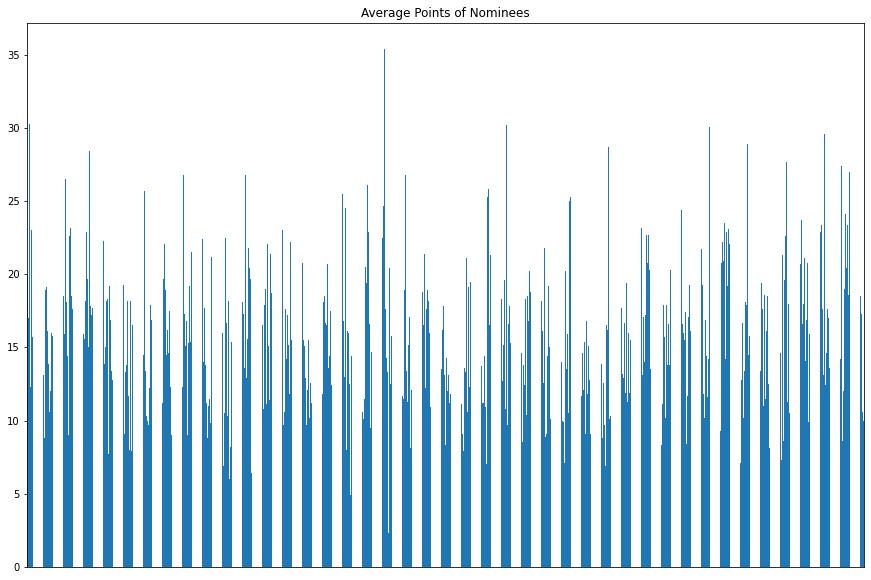


Min points scored: 2.3
Max points scored: 35.4
Avg points scored: 15.892830188679245

Q1: 12.1
Q3: 19.0
IQR: 6.9

Outliers: 1.7499999999999982


In [30]:
import matplotlib.pyplot as plt
import numpy as np

df_all_stats_nominees["PTS"].plot.bar(figsize=(15,10))

# Remove x-labels
plt.xticks([])
plt.title("Average Points of Nominees")
plt.show()

print("")
print('Min points scored: ' + str(min(df_all_stats_nominees["PTS"])))
print('Max points scored: ' + str(max(df_all_stats_nominees["PTS"])))
print('Avg points scored: ' + str((df_all_stats_nominees["PTS"]).mean()))

q3, q1 = np.percentile(df_all_stats_nominees['PTS'], [75 ,25])
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)

print("")
print("Q1: " + str(q1))
print("Q3: " + str(q3))
print("IQR: " + str(IQR))

print("")
print("Outliers: " + str(lower_fence))

In [31]:
df_all_stats_nominees[df_all_stats_nominees['PTS'] < 12.1]

,GS,Player,MP,PTS,AST,TRB,STL,BLK,Nominee,year
82,82.0,James Donaldson,36.9,10.8,0.8,11.9,0.6,1.7,True,1987
129,72.0,Bob Hansen,20.2,9.7,1.4,2.8,0.6,0.1,True,1987
254,64.0,John Paxson,32.8,11.3,5.7,1.7,0.8,0.1,True,1987
305,78.0,Larry Smith,29.7,8.8,1.2,11.5,0.9,0.7,True,1987
19,1.0,John Battle,18.3,10.6,2.4,1.7,0.5,0.1,True,1988
...,...,...,...,...,...,...,...,...,...,...
701,55.0,Derrick White,25.8,9.9,3.9,3.7,1.0,0.7,True,2019
444,3.0,T.J. McConnell,26.0,8.6,6.6,3.7,1.9,0.3,True,2021
544,7.0,Jordan Poole,19.4,12.0,1.9,1.8,0.5,0.2,True,2021
729,16.0,Max Strus,23.3,10.6,1.4,3.0,0.4,0.2,True,2022


**Analysis**: Most of the players who were nominated lied in the range of 12 points and 19 points. There were no outliers in this group. Using Q1 as minimum threshold may be appropriate for this statistic.

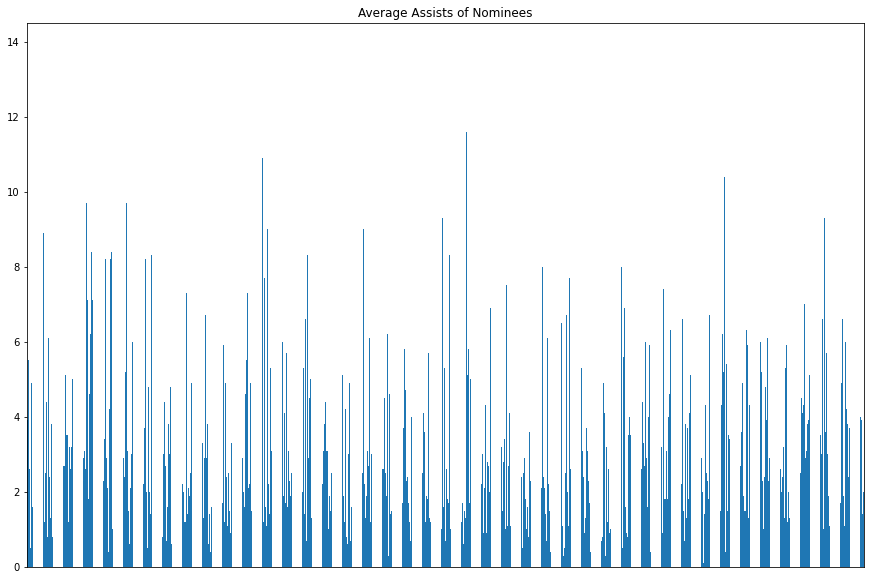


Min assists: 0.1
Max assists: 13.8
Avg assists: 3.2471698113207546

Q1: 1.5
Q3: 4.4
IQR: 2.9000000000000004

Outliers: -2.8500000000000005


In [32]:
import matplotlib.pyplot as plt
import numpy as np

df_all_stats_nominees["AST"].plot.bar(figsize=(15,10))

# Remove x-labels
plt.xticks([])
plt.title("Average Assists of Nominees")
plt.show()

print("")
print('Min assists: ' + str(min(df_all_stats_nominees["AST"])))
print('Max assists: ' + str(max(df_all_stats_nominees["AST"])))
print('Avg assists: ' + str((df_all_stats_nominees["AST"]).mean()))

q3, q1 = np.percentile(df_all_stats_nominees['AST'], [75 ,25])
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)
print("")
print("Q1: " + str(q1))
print("Q3: " + str(q3))
print("IQR: " + str(IQR))

print("")
print("Outliers: " + str(lower_fence))

In [33]:
df_all_stats_nominees[df_all_stats_nominees['AST'] < 1.5]

,GS,Player,MP,PTS,AST,TRB,STL,BLK,Nominee,year
382,59.0,Kevin Willis,28.0,12.3,0.5,8.6,0.8,0.5,True,1986
82,82.0,James Donaldson,36.9,10.8,0.8,11.9,0.6,1.7,True,1987
129,72.0,Bob Hansen,20.2,9.7,1.4,2.8,0.6,0.1,True,1987
210,79.0,Tim McCormick,34.8,12.8,1.4,7.5,0.4,0.8,True,1987
305,78.0,Larry Smith,29.7,8.8,1.2,11.5,0.9,0.7,True,1987
...,...,...,...,...,...,...,...,...,...,...
74,14.0,Chris Boucher,24.2,13.6,1.1,6.7,0.6,1.9,True,2021
117,63.0,Clint Capela,30.1,15.2,0.8,14.3,0.7,2.0,True,2021
547,54.0,Michael Porter Jr.,31.3,19.0,1.1,7.3,0.7,0.9,True,2021
373,78.0,Jaren Jackson Jr.,27.3,16.3,1.1,5.8,0.9,2.3,True,2022


**Analysis**: Most of the players who were nominated lied in the range of 1.5 assists and 4.4 assists. There were no outliers in this group. Using Q1 as minimum threshold may be appropriate for this statistic.

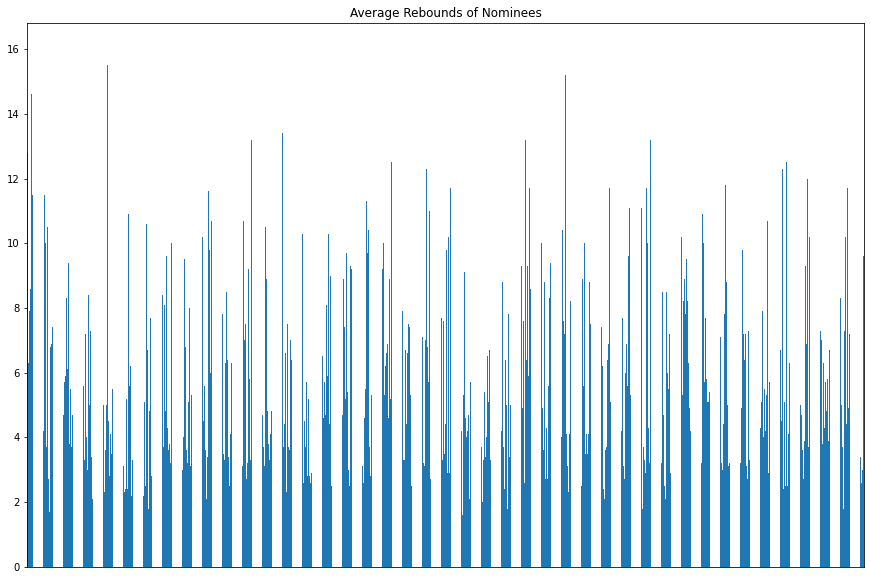


Min rebounds: 1.3
Max rebounds: 16.0
Avg rebounds: 5.965534591194969

Q1: 3.6
Q3: 7.8
IQR: 4.199999999999999

Outliers: -2.699999999999999


In [34]:
import matplotlib.pyplot as plt
import numpy as np

df_all_stats_nominees["TRB"].plot.bar(figsize=(15,10))

# Remove x-labels
plt.xticks([])
plt.title("Average Rebounds of Nominees")
plt.show()

print("")
print('Min rebounds: ' + str(min(df_all_stats_nominees["TRB"])))
print('Max rebounds: ' + str(max(df_all_stats_nominees["TRB"])))
print('Avg rebounds: ' + str((df_all_stats_nominees["TRB"]).mean()))

q3, q1 = np.percentile(df_all_stats_nominees['TRB'], [75 ,25])
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)
print("")
print("Q1: " + str(q1))
print("Q3: " + str(q3))
print("IQR: " + str(IQR))

print("")
print("Outliers: " + str(lower_fence))

In [35]:
df_all_stats_nominees[df_all_stats_nominees['TRB'] < 3.6]

,GS,Player,MP,PTS,AST,TRB,STL,BLK,Nominee,year
112,82.0,Sleepy Floyd,37.4,18.8,10.3,3.3,1.8,0.2,True,1987
129,72.0,Bob Hansen,20.2,9.7,1.4,2.8,0.6,0.1,True,1987
254,64.0,John Paxson,32.8,11.3,5.7,1.7,0.8,0.1,True,1987
3,75.0,Michael Adams,33.9,13.9,6.1,2.7,2.0,0.2,True,1988
19,1.0,John Battle,18.3,10.6,2.4,1.7,0.5,0.1,True,1988
...,...,...,...,...,...,...,...,...,...,...
255,68.0,Darius Garland,35.7,21.7,8.6,3.3,1.3,0.1,True,2022
501,74.0,Tyrese Maxey,35.3,17.5,4.3,3.2,0.7,0.4,True,2022
618,51.0,Jordan Poole,30.0,18.5,4.0,3.4,0.8,0.3,True,2022
697,30.0,Anfernee Simons,29.5,17.3,3.9,2.6,0.5,0.1,True,2022


**Analysis**: Most of the players who were nominated lied in the range of 3.6 rebounds and 7.8 rebounds. There were no outliers in this group. Using Q1 as minimum threshold may be appropriate for this statistic.

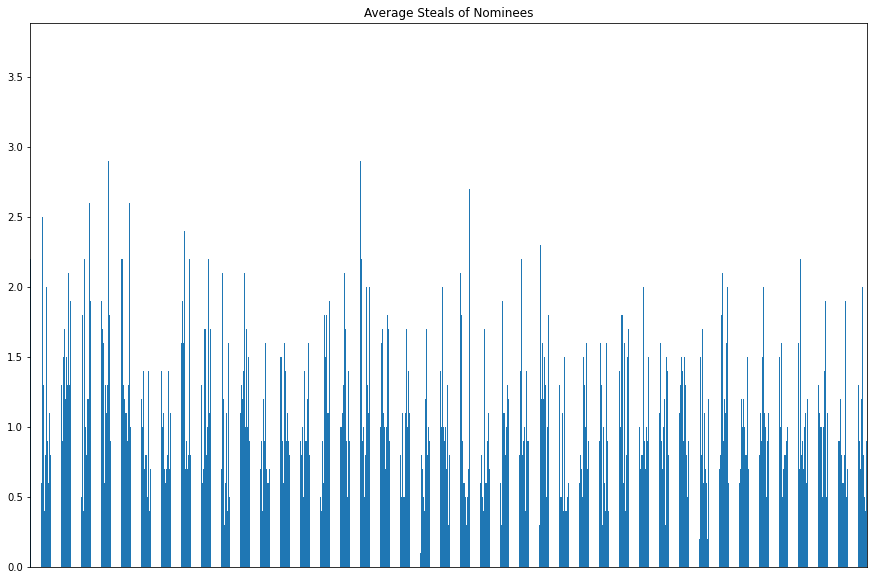


Min steals: 0.1
Max steals: 3.7
Avg steals: 1.0977358490566038

Q1: 0.7
Q3: 1.4
IQR: 0.7

Outliers: -0.34999999999999987


In [36]:
import matplotlib.pyplot as plt
import numpy as np

df_all_stats_nominees["STL"].plot.bar(figsize=(15,10))

# Remove x-labels
plt.xticks([])
plt.title("Average Steals of Nominees")
plt.show()

print("")
print('Min steals: ' + str(min(df_all_stats_nominees["STL"])))
print('Max steals: ' + str(max(df_all_stats_nominees["STL"])))
print('Avg steals: ' + str((df_all_stats_nominees["STL"]).mean()))

q3, q1 = np.percentile(df_all_stats_nominees['STL'], [75 ,25])
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)
print("")
print("Q1: " + str(q1))
print("Q3: " + str(q3))
print("IQR: " + str(IQR))

print("")
print("Outliers: " + str(lower_fence))

In [37]:
df_all_stats_nominees[df_all_stats_nominees['STL'] < 0.7]

,GS,Player,MP,PTS,AST,TRB,STL,BLK,Nominee,year
82,82.0,James Donaldson,36.9,10.8,0.8,11.9,0.6,1.7,True,1987
129,72.0,Bob Hansen,20.2,9.7,1.4,2.8,0.6,0.1,True,1987
166,74.0,Steve Johnson,29.7,16.8,2.0,7.2,0.6,1.0,True,1987
210,79.0,Tim McCormick,34.8,12.8,1.4,7.5,0.4,0.8,True,1987
328,82.0,Otis Thorpe,36.0,18.9,2.5,10.0,0.6,0.7,True,1987
...,...,...,...,...,...,...,...,...,...,...
245,54.0,Jerami Grant,33.9,22.3,2.8,4.6,0.6,1.1,True,2021
308,61.0,Richaun Holmes,29.2,14.2,1.7,8.3,0.6,1.6,True,2021
544,7.0,Jordan Poole,19.4,12.0,1.9,1.8,0.5,0.2,True,2021
697,30.0,Anfernee Simons,29.5,17.3,3.9,2.6,0.5,0.1,True,2022


**Analysis**: Most of the players who were nominated lied in the range of 0.7 steals and 1.4 steals. There were no outliers in this group. Using Q1 as minimum threshold may be appropriate for this statistic.

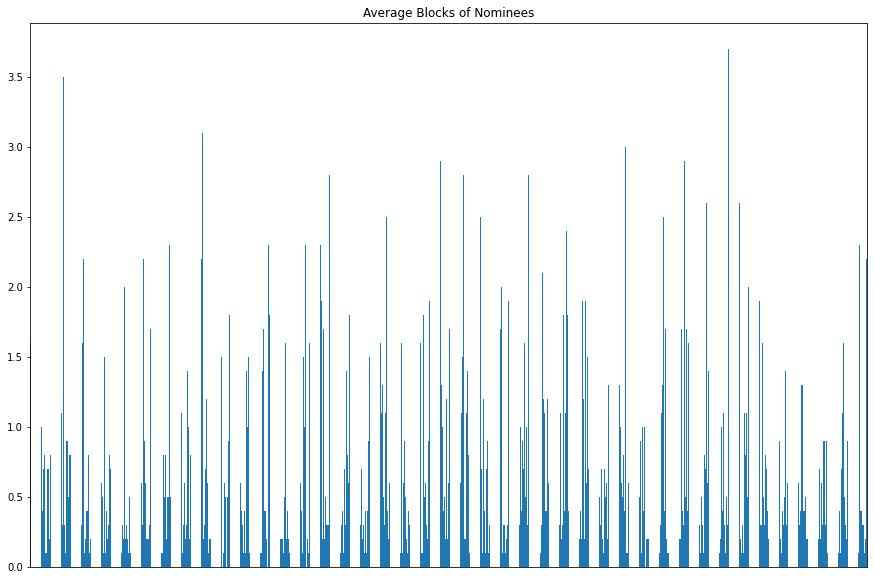


Min blocks: 0.0
Max blocks: 3.7
Avg blocks: 0.7299371069182391

Q1: 0.2
Q3: 1.0
IQR: 0.8

Outliers: -1.0000000000000002


In [38]:
import matplotlib.pyplot as plt
import numpy as np

df_all_stats_nominees["BLK"].plot.bar(figsize=(15,10))

# Remove x-labels
plt.xticks([])
plt.title("Average Blocks of Nominees")
plt.show()

print("")
print('Min blocks: ' + str(min(df_all_stats_nominees["BLK"])))
print('Max blocks: ' + str(max(df_all_stats_nominees["BLK"])))
print('Avg blocks: ' + str((df_all_stats_nominees["BLK"]).mean()))

q3, q1 = np.percentile(df_all_stats_nominees['BLK'], [75 ,25])
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)
print("")
print("Q1: " + str(q1))
print("Q3: " + str(q3))
print("IQR: " + str(IQR))

print("")
print("Outliers: " + str(lower_fence))

In [39]:
df_all_stats_nominees[df_all_stats_nominees['BLK'] < 0.2]

,GS,Player,MP,PTS,AST,TRB,STL,BLK,Nominee,year
129,72.0,Bob Hansen,20.2,9.7,1.4,2.8,0.6,0.1,True,1987
254,64.0,John Paxson,32.8,11.3,5.7,1.7,0.8,0.1,True,1987
266,80.0,Terry Porter,33.9,13.1,8.9,4.2,2.0,0.1,True,1987
19,1.0,John Battle,18.3,10.6,2.4,1.7,0.5,0.1,True,1988
212,77.0,Larry Krystkowiak,30.9,12.7,1.3,7.6,1.2,0.1,True,1989
...,...,...,...,...,...,...,...,...,...,...
134,1.0,Jordan Clarkson,26.7,18.4,2.5,4.0,0.9,0.1,True,2021
228,50.0,Darius Garland,33.1,17.4,6.1,2.4,1.2,0.1,True,2021
102,61.0,Jalen Brunson,31.9,16.3,4.8,3.9,0.8,0.0,True,2022
255,68.0,Darius Garland,35.7,21.7,8.6,3.3,1.3,0.1,True,2022


**Analysis**: Most of the players who were nominated lied in the range of 0.2 blocks and 1 blocks. There were no outliers in this group. Using Q1 as minimum threshold may be appropriate for this statistic.

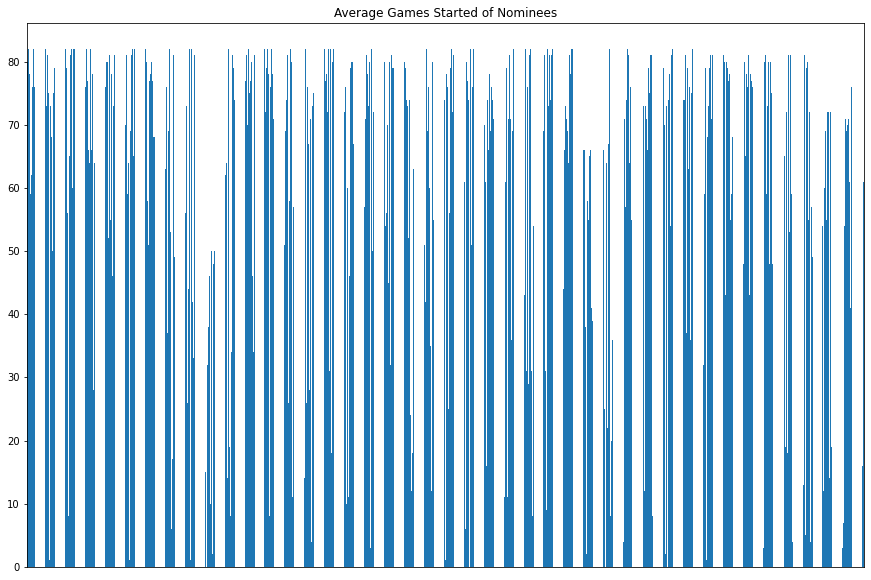


Min Games Started: 0.0
Max Games Started: 82.0
Avg Games Started: 59.98364779874214

Q1: 49.0
Q3: 79.0
IQR: 30.0

Outliers: 4.0


In [40]:
import matplotlib.pyplot as plt
import numpy as np

df_all_stats_nominees["GS"].plot.bar(figsize=(15,10))

# Remove x-labels
plt.xticks([])
plt.title("Average Games Started of Nominees")
plt.show()

print("")
print('Min Games Started: ' + str(min(df_all_stats_nominees["GS"])))
print('Max Games Started: ' + str(max(df_all_stats_nominees["GS"])))
print('Avg Games Started: ' + str((df_all_stats_nominees["GS"]).mean()))

q3, q1 = np.percentile(df_all_stats_nominees['GS'], [75 ,25])
IQR = q3 - q1
lower_fence = q1 - (1.5 * IQR)
print("")
print("Q1: " + str(q1))
print("Q3: " + str(q3))
print("IQR: " + str(IQR))

print("")
print("Outliers: " + str(lower_fence))

In [41]:
df_all_stats_nominees[df_all_stats_nominees['GS'] < 49]

,GS,Player,MP,PTS,AST,TRB,STL,BLK,Nominee,year
19,1.0,John Battle,18.3,10.6,2.4,1.7,0.5,0.1,True,1988
353,9.0,Roy Tarpley,28.5,13.5,1.1,11.8,1.3,1.1,True,1988
17,12.0,Ron Anderson,31.9,16.2,1.7,5.0,0.9,0.3,True,1989
323,8.0,Dennis Rodman,26.9,9.0,1.2,9.4,0.7,0.9,True,1989
363,18.0,Detlef Schrempf,33.0,16.2,3.2,7.9,0.8,0.2,True,1990
...,...,...,...,...,...,...,...,...,...,...
444,3.0,T.J. McConnell,26.0,8.6,6.6,3.7,1.9,0.3,True,2021
544,7.0,Jordan Poole,19.4,12.0,1.9,1.8,0.5,0.2,True,2021
722,41.0,Christian Wood,32.3,21.0,1.7,9.6,0.8,1.2,True,2021
697,30.0,Anfernee Simons,29.5,17.3,3.9,2.6,0.5,0.1,True,2022


**Analysis**: Most of the players who were nominated lied in the range of 49 games started and 79 games started. There were no outliers in this group. Using Q1 as minimum threshold may be appropriate for this statistic.

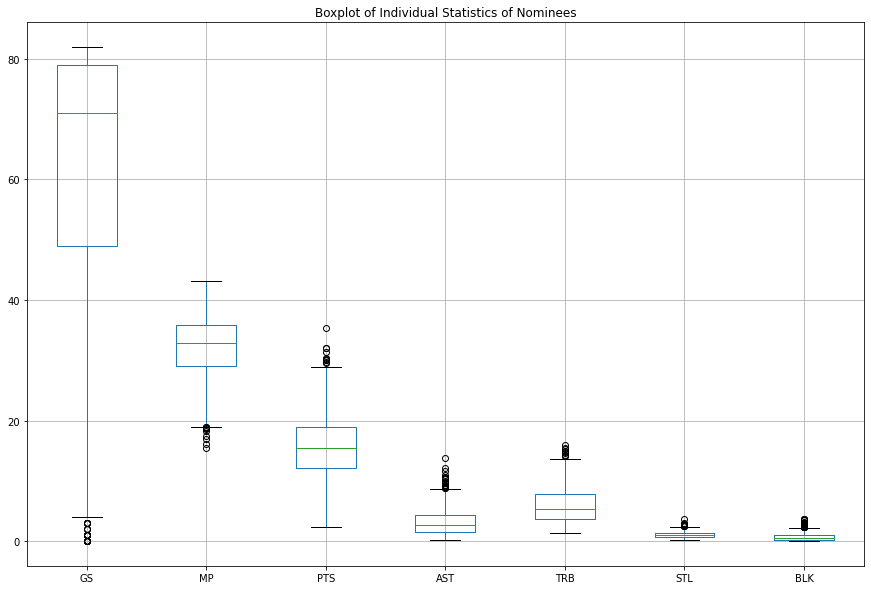

In [42]:
boxplot = df_all_stats_nominees.boxplot(column=quant, figsize=(15,10))
plt.title('Boxplot of Individual Statistics of Nominees')
plt.show()

**Minimum Threshold Full Analysis**: For an NBA player to be considered an MIP candidate, we feel like they must be above the 25% percentile for each respective category. However, because we recognize some players may excel in one category over another, we are concluding that they must be the above 25% percentile in at least 4 (majority) categories. The minimum thresholds are:


1.   29.1 minutes per game
2.   12.1 points per game
3.   1.5 asists per game
4.   3.6 rebounds per game
5.   0.7 steals per game
6.   0.2 blocks per game
7.   49 Games Started



#**Machine Learning: Training Models to Predict MIP Candidates**

## **Classification Models**: MIP Candidate

In [43]:
# We will try to run different models to predict the most improved players 

# first we need to split up the data into a test and training set
# Split up the data chronologically with the last five years to be the test

train = df_all[df_all["year"] < 2018]
test = df_all[df_all["year"] >= 2018]

X_train = train[['MP_diff', 'PTS_diff', 'AST_diff', 'TRB_diff', 'STL_diff',
                 'BLK_diff']]
y_train = train["Nominee"]

x_test = test[['MP_diff', 'PTS_diff', 'AST_diff', 'TRB_diff', 'STL_diff',
               'BLK_diff']]
y_test = test["Nominee"]

#based of the graphs we can see that the variables with the most statistical 
# influence was points, minutes, rebounds, and assists so we will be using those
# variables for the training of the model

# first we will be looking at how many different variables we want to use and
# model with in training our model

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report

pre_pro = [(StandardScaler(), ['MP_diff']), (StandardScaler(), ["PTS_diff"]),
           (StandardScaler(), ["AST_diff"]), (StandardScaler(), ['TRB_diff']),
           (StandardScaler(), ['STL_diff']),(StandardScaler(), ['BLK_diff'])]

model = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

for value in range(1, len(pre_pro) + 1):
  pipeline = make_pipeline(make_column_transformer(*pre_pro[:value]),
                           model)
  pipeline.fit(X=X_train, y=y_train)
  y_pred_ = pipeline.predict(x_test)


  print(cross_val_score(pipeline, x_test, y_test, 
                        scoring="accuracy", cv = 10).mean(),
        cross_val_score(pipeline, x_test, y_test, 
                        scoring="f1_macro", cv = 10).mean())
  print(confusion_matrix(y_test, y_pred_))
  print(classification_report(y_test, y_pred_))

0.953065515714918 0.487981123270212
[[2388   20]
 [ 102    4]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98      2408
        True       0.17      0.04      0.06       106

    accuracy                           0.95      2514
   macro avg       0.56      0.51      0.52      2514
weighted avg       0.93      0.95      0.94      2514

0.954655979257573 0.5570563366777587
[[2362   46]
 [  84   22]]
              precision    recall  f1-score   support

       False       0.97      0.98      0.97      2408
        True       0.32      0.21      0.25       106

    accuracy                           0.95      2514
   macro avg       0.64      0.59      0.61      2514
weighted avg       0.94      0.95      0.94      2514

0.9562511857332574 0.5894671728716834
[[2358   50]
 [  83   23]]
              precision    recall  f1-score   support

       False       0.97      0.98      0.97      2408
        True       0.32      0.22      0.26  

Notice that the best variables to use for our model are Minutes, Points, Assists, and Rebounds. When we add extra variables we reach a point where the accuracy and the f1 score do not improve. 

Now we will look at the different scalling methods to see which scalling method increases how accurate our model will be. We will also look at different distance metrics as well. 

In [44]:
scalers = [StandardScaler(), MinMaxScaler(), Normalizer()]
distances = ["euclidean", "cosine", "manhattan"]

X_train = train[['MP_diff', 'PTS_diff', 'AST_diff', 'TRB_diff']]


x_test = test[['MP_diff', 'PTS_diff', 'AST_diff', 'TRB_diff']]

for scaler in scalers:
  pre_pro = [(scaler, ['MP_diff']), (scaler, ["PTS_diff"]),
             (scaler, ["AST_diff"]), (scaler, ['TRB_diff'])]

  for distance in distances:

    pipeline = make_pipeline(make_column_transformer(*pre_pro), 
                                       KNeighborsClassifier(n_neighbors = 2, 
                                                            metric = distance))
    
    pipeline.fit(X=X_train, y=y_train)
    y_pred_ = pipeline.predict(x_test)
    print(scaler, distance, cross_val_score(pipeline, x_test, y_test, 
                          scoring="accuracy", cv = 10).mean(),
          cross_val_score(pipeline, x_test, y_test, 
                          scoring="f1_macro", cv = 10).mean())
    print(confusion_matrix(y_test, y_pred_))
    print(classification_report(y_test, y_pred_))

StandardScaler() euclidean 0.9546575602352496 0.5620243453569542
[[2368   40]
 [  86   20]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97      2408
        True       0.33      0.19      0.24       106

    accuracy                           0.95      2514
   macro avg       0.65      0.59      0.61      2514
weighted avg       0.94      0.95      0.94      2514

StandardScaler() cosine 0.9522718649212674 0.48777376978996506
[[2374   34]
 [  99    7]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.97      2408
        True       0.17      0.07      0.10       106

    accuracy                           0.95      2514
   macro avg       0.57      0.53      0.53      2514
weighted avg       0.93      0.95      0.94      2514

StandardScaler() manhattan 0.9562464428002275 0.5512124562901841
[[2377   31]
 [  90   16]]
              precision    recall  f1-score   support

       False     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Normalizer() cosine 0.9332353127173842 0.48964075690981596
[[2408    0]
 [ 106    0]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      2408
        True       0.00      0.00      0.00       106

    accuracy                           0.96      2514
   macro avg       0.48      0.50      0.49      2514
weighted avg       0.92      0.96      0.94      2514



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Normalizer() manhattan 0.955846455448049 0.49458438019018336
[[2408    0]
 [ 106    0]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      2408
        True       0.00      0.00      0.00       106

    accuracy                           0.96      2514
   macro avg       0.48      0.50      0.49      2514
weighted avg       0.92      0.96      0.94      2514



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Notice that the best metric is using the StandardScaler with the manhattan scaler. Now we have to look at the right K values 

In [45]:
pre_pro = [(StandardScaler(), ['MP_diff']), (StandardScaler(), ["PTS_diff"]),
           (StandardScaler(), ["AST_diff"]), (scaler, ['TRB_diff'])]


for k in range(1,30):
  model = KNeighborsClassifier(n_neighbors=k, metric ='manhattan')


  pipeline = make_pipeline(make_column_transformer(*pre_pro[:value]),
                           model)
  pipeline.fit(X=X_train, y=y_train)
  y_pred_ = pipeline.predict(x_test)
  print(k, cross_val_score(pipeline, x_test, y_test, 
                        scoring="accuracy", cv = 10).mean(),
        cross_val_score(pipeline, x_test, y_test, 
                        scoring="f1_macro", cv = 10).mean())

1 0.936764054891545 0.6044867888220676
2 0.9570432555492315 0.5695380743869157
3 0.9538654904192754 0.634093868977932
4 0.9586353000695629 0.58295278458662
5 0.9570448365269082 0.6219801050001961
6 0.9594321128185671 0.581198056428829
7 0.9586400430025929 0.6209347833823948
8 0.9594273698855373 0.5693915395770008
9 0.9594289508632137 0.6008334978388556
10 0.9606225890090432 0.5762937170506126
11 0.9578416492759123 0.5735250935083507
12 0.9598289382153922 0.5565009212606011
13 0.9582384746727375 0.5624901377485314
14 0.959033706444065 0.5480800648592314
15 0.9582384746727376 0.5637713958146101
16 0.9578416492759123 0.5394391535316052
17 0.9574448238790868 0.5528542111023432
18 0.9582384746727376 0.5381452777552377
19 0.9578400682982355 0.5369420318911752
20 0.9582368936950608 0.5226524159053052
21 0.957440080946057 0.5218027271881387
22 0.9582384746727375 0.5150812110491467
23 0.9578400682982355 0.5219074503221357
24 0.9578400682982355 0.514219724073316
25 0.959033706444065 0.5389945330

Best K Value is 5

In [46]:
pre_pro = [(StandardScaler(), ['MP_diff']), (StandardScaler(), ["PTS_diff"]),
           (StandardScaler(), ["AST_diff"]), (scaler, ['TRB_diff'])]

model = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan')

pipeline = make_pipeline(make_column_transformer(*pre_pro[:value]),
                           model)
pipeline.fit(X=X_train, y=y_train)
y_pred_ = pipeline.predict(x_test)

print(cross_val_score(pipeline, x_test, y_test, 
                        scoring="accuracy", cv = 10).mean(),
        cross_val_score(pipeline, x_test, y_test, 
                        scoring="f1_macro", cv = 10).mean())

print(confusion_matrix(y_test, y_pred_))
print(classification_report(y_test, y_pred_))

predictions = x_test.copy()
predictions[['name', 'year']] = test[['Player','year']]
predictions['predictions'] = y_pred_
predictions[(predictions['predictions'] == 1)]

0.9570448365269082 0.6219801050001961
[[2336   72]
 [  67   39]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      2408
        True       0.35      0.37      0.36       106

    accuracy                           0.94      2514
   macro avg       0.66      0.67      0.67      2514
weighted avg       0.95      0.94      0.95      2514



,MP_diff,PTS_diff,AST_diff,TRB_diff,name,year,predictions
10941,-0.5,2.8,1.3,1.3,Devin Booker,2018,True
10949,13.5,7.9,0.8,2.1,Jaylen Brown,2018,True
10951,12.8,6.8,0.6,0.4,Reggie Bullock,2018,True
10952,9.5,7.8,2.9,1.2,Trey Burke,2018,True
10987,7.4,4.9,0.9,1.4,Dewayne Dedmon,2018,True
...,...,...,...,...,...,...,...
13292,6.4,5.5,0.0,1.2,Kelly Oubre Jr.,2023,True
13297,2.3,4.9,0.2,1.7,Mason Plumlee,2023,True
13302,-0.4,7.3,-0.8,-1.2,Michael Porter Jr.,2023,True
13315,0.6,5.5,-1.0,0.3,Julius Randle,2023,True


In [47]:
from sklearn.tree import DecisionTreeClassifier

scalers = [StandardScaler(), MinMaxScaler(), Normalizer()]

for scaler in scalers:
  pre_pro = [(scaler, ['MP_diff']), (scaler, ["PTS_diff"]),
             (scaler, ["AST_diff"]), (scaler, ['TRB_diff'])]

  model2 = make_pipeline(make_column_transformer(*pre_pro), 
                           DecisionTreeClassifier(random_state = 0))
  model2.fit(X_train, y_train)
  y_pred_ = model2.predict(x_test)
  
  print(scaler, cross_val_score(model2, x_test, y_test, 
                                scoring="accuracy", cv = 10).mean(),
        cross_val_score(model2, x_test, y_test, 
                        scoring="recall_macro", cv = 10).mean())
  
  print(confusion_matrix(y_test, y_pred_))
  print(classification_report(y_test, y_pred_))

StandardScaler() 0.9387497628533484 0.6486753426379982
[[2243  165]
 [  71   35]]
              precision    recall  f1-score   support

       False       0.97      0.93      0.95      2408
        True       0.17      0.33      0.23       106

    accuracy                           0.91      2514
   macro avg       0.57      0.63      0.59      2514
weighted avg       0.94      0.91      0.92      2514

MinMaxScaler() 0.9387466008979952 0.6486753426379982
[[2240  168]
 [  71   35]]
              precision    recall  f1-score   support

       False       0.97      0.93      0.95      2408
        True       0.17      0.33      0.23       106

    accuracy                           0.90      2514
   macro avg       0.57      0.63      0.59      2514
weighted avg       0.94      0.90      0.92      2514

Normalizer() 0.957838487320559 0.5
[[2408    0]
 [ 106    0]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      2408
        True 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.linear_model import LogisticRegression

scalers = [StandardScaler(), MinMaxScaler(), Normalizer()]

for scaler in scalers:
  pre_pro = [(scaler, ['MP_diff']), (scaler, ["PTS_diff"]),
             (scaler, ["AST_diff"]), (scaler, ['TRB_diff'])]

  model3 = make_pipeline(make_column_transformer(*pre_pro), 
                           LogisticRegression(random_state = 0))
  
  model3.fit(X_train, y_train)
  y_pred_ = model3.predict(x_test)
  
  print(scaler, cross_val_score(model3, x_test, y_test, 
                                scoring="accuracy", cv = 10).mean(),
        cross_val_score(model3, x_test, y_test, 
                        scoring="recall_macro", cv = 10).mean())

  print(confusion_matrix(y_test, y_pred_))
  print(classification_report(y_test, y_pred_))

StandardScaler() 0.9578416492759123 0.5725861310197409
[[2362   46]
 [  62   44]]
              precision    recall  f1-score   support

       False       0.97      0.98      0.98      2408
        True       0.49      0.42      0.45       106

    accuracy                           0.96      2514
   macro avg       0.73      0.70      0.71      2514
weighted avg       0.95      0.96      0.96      2514

MinMaxScaler() 0.9562511857332574 0.5039626556016598
[[2386   22]
 [  86   20]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      2408
        True       0.48      0.19      0.27       106

    accuracy                           0.96      2514
   macro avg       0.72      0.59      0.62      2514
weighted avg       0.94      0.96      0.95      2514

Normalizer() 0.957838487320559 0.5
[[2408    0]
 [ 106    0]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      2408
        True 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
y_pred_ = pd.Series(y_pred_)
y_pred_

predictions = test[['Player','year']]
index_list = list(range(0, len(predictions.index)))
predictions = predictions.set_axis(index_list, axis='index')
predictions['Nominees'] = y_pred_

Nominees = predictions[predictions["Nominees"] == True]
Nominees[Nominees["year"] == 2020]

,Player,year,Nominees


In [50]:
from sklearn.ensemble import RandomForestClassifier

pre_pro = [(StandardScaler(), ['MP_diff']), (StandardScaler(), ["PTS_diff"]),
             (StandardScaler(), ["AST_diff"]), (StandardScaler(), ['TRB_diff'])]

model4 = make_pipeline(make_column_transformer(*pre_pro), 
                       RandomForestClassifier(random_state = 0))

model4.fit(X_train, y_train)
y_pred_ = model4.predict(x_test)

print(scaler, cross_val_score(model4, x_test, y_test, 
                              scoring="accuracy", cv = 10).mean(),
      cross_val_score(model4, x_test, y_test, 
                      scoring="recall_macro", cv = 10).mean())
  
print(confusion_matrix(y_test, y_pred_))
print(classification_report(y_test, y_pred_))

Normalizer() 0.9574432429014103 0.5910942411668552
[[2346   62]
 [  70   36]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      2408
        True       0.37      0.34      0.35       106

    accuracy                           0.95      2514
   macro avg       0.67      0.66      0.66      2514
weighted avg       0.95      0.95      0.95      2514



In [51]:
from sklearn.ensemble import GradientBoostingClassifier

pre_pro = [(StandardScaler(), ['MP_diff']), (StandardScaler(), ["PTS_diff"]),
             (StandardScaler(), ["AST_diff"]), (StandardScaler(), ['TRB_diff'])]

model5 = make_pipeline(make_column_transformer(*pre_pro), 
                       GradientBoostingClassifier(random_state = 0))

model5.fit(X_train, y_train)
y_pred_ = model5.predict(x_test)

print(scaler, cross_val_score(model5, x_test, y_test, 
                              scoring="accuracy", cv = 10).mean(),
      cross_val_score(model5, x_test, y_test, 
                      scoring="recall_macro", cv = 10).mean())
  
print(confusion_matrix(y_test, y_pred_))
print(classification_report(y_test, y_pred_))

Normalizer() 0.9558511983810789 0.6137707468879668
[[2357   51]
 [  62   44]]
              precision    recall  f1-score   support

       False       0.97      0.98      0.98      2408
        True       0.46      0.42      0.44       106

    accuracy                           0.96      2514
   macro avg       0.72      0.70      0.71      2514
weighted avg       0.95      0.96      0.95      2514



In [52]:
pre_pro = [(StandardScaler(), ['MP_diff']), (StandardScaler(), ["PTS_diff"]),
             (StandardScaler(), ["AST_diff"]), (StandardScaler(), ['TRB_diff'])]

model1 = make_pipeline(make_column_transformer(*pre_pro),
                       KNeighborsClassifier(n_neighbors=3, metric = 'manhattan'))

model2 = make_pipeline(make_column_transformer(*pre_pro), 
                           DecisionTreeClassifier(random_state = 0))

model3 = make_pipeline(make_column_transformer(*pre_pro), 
                           LogisticRegression(random_state = 0))

model4 = make_pipeline(make_column_transformer(*pre_pro),
                       RandomForestClassifier(random_state = 0))


model5 = make_pipeline(make_column_transformer(*pre_pro),
                       GradientBoostingClassifier(random_state = 0))

from sklearn.ensemble import VotingClassifier

voter = VotingClassifier([("Model 1", model1),
                         ("Model 2", model2),
                         ("Model 3", model3),
                         ("Model 4", model4),
                         ("Model 5", model5)])

print(cross_val_score(voter, x_test, y_test, 
                      scoring="accuracy", cv = 10).mean(),
      cross_val_score(voter, x_test, y_test, 
                      scoring="recall_macro", cv = 10).mean())

voter.fit(X_train, y_train)
y_pred_ = voter.predict(x_test)
y_pred_

print(confusion_matrix(y_test, y_pred_))
print(classification_report(y_test, y_pred_))

0.9582384746727378 0.5953926191374325
[[2357   51]
 [  67   39]]
              precision    recall  f1-score   support

       False       0.97      0.98      0.98      2408
        True       0.43      0.37      0.40       106

    accuracy                           0.95      2514
   macro avg       0.70      0.67      0.69      2514
weighted avg       0.95      0.95      0.95      2514



In [53]:
from sklearn.ensemble import StackingClassifier

stacker = StackingClassifier([("Model 1", model1),
                              ("Model 2", model2),
                              ("Model 3", model3),
                              ("Model 4", model4),
                              ("Model 5", model5)])

print(cross_val_score(stacker, x_test, y_test, 
                      scoring="accuracy", cv = 10).mean(),
      cross_val_score(stacker, x_test, y_test, 
                      scoring="recall_macro", cv = 10).mean())

voter.fit(X_train, y_train)
y_pred_ = voter.predict(x_test)

print(confusion_matrix(y_test, y_pred_))
print(classification_report(y_test, y_pred_))

0.9598305191930692 0.591430827989438
[[2357   51]
 [  67   39]]
              precision    recall  f1-score   support

       False       0.97      0.98      0.98      2408
        True       0.43      0.37      0.40       106

    accuracy                           0.95      2514
   macro avg       0.70      0.67      0.69      2514
weighted avg       0.95      0.95      0.95      2514



Going back and looking at the best model we want to optimize the recall score for True based off of the classification report and for that the best model remains to be logistic regression classification with a 60 percent true recall score and is thus the best model for the MIP nominees predicition.

## **Regression Models**: MIP Voteshares

We will now be training models by predicting voteshares a player will be getting. This method could prove to be more benefitial as there is now a way to rank players who are nominated.

###**Pulling out test data**

To create testing data, we decided to reserve all years after 2017 for testing.

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report

quant = ['GS', 'MP_diff', 'MP', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff', 'TRB', 'STL_diff', 'BLK_diff', 'Share']
df_all[quant] = df_all[quant].astype(float)

train = df_all[df_all["year"] < 2018]
test = df_all[(df_all["year"] >= 2018) & (df_all["year"] < 2023)]

X_train = train[['GS', 'MP_diff', 'MP', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff', 'TRB', 'STL_diff',
                 'BLK_diff']]
y_train = train["Share"]

x_test = test[['GS', 'MP_diff', 'MP', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff', 'TRB', 'STL_diff',
                 'BLK_diff']]
y_test = test["Share"]

In [55]:
train

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff,Nominee,Share
0,Kareem Abdul-Jabbar,38,79,79.0,33.3,9.6,16.9,.564,0.0,0.0,...,-1.4,-1.8,0.3,0.0,-0.5,0.1,0.1,1.4,False,0.0
1,Alvan Adams,31,78,45.0,25.7,4.4,8.7,.502,0.0,0.0,...,0.0,0.0,0.4,-0.1,0.0,0.2,0.4,-3.9,False,0.0
2,Mark Aguirre,26,74,73.0,33.8,9.0,17.9,.503,0.2,0.8,...,0.0,0.0,1.5,0.0,-0.1,0.2,0.0,-3.1,False,0.0
3,Danny Ainge,26,80,78.0,30.1,4.4,8.8,.504,0.3,0.9,...,-0.2,-0.7,-0.2,-0.4,0.0,-0.4,-0.4,-2.2,False,0.0
4,Ron Anderson,27,77,30.0,21.8,4.0,8.2,.494,0.0,0.1,...,0.5,1.2,1.0,0.4,-0.1,0.2,0.5,3.4,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10894,Joe Young,24,33,0.0,4.1,0.8,2.2,.361,0.2,0.7,...,-0.6,-0.7,-1.1,-0.3,0.0,-0.6,-0.5,-1.7,False,0.0
10895,Nick Young,31,60,60.0,25.9,4.5,10.6,.430,2.8,7.0,...,0.4,0.5,0.4,0.2,0.1,0.0,1.4,5.9,False,0.0
10896,Thaddeus Young,28,74,74.0,30.2,4.9,9.3,.527,0.6,1.6,...,-2.3,-2.9,-0.3,0.0,-0.1,-0.6,-0.7,-4.1,False,0.0
10897,Cody Zeller,24,62,58.0,27.8,4.1,7.1,.571,0.0,0.0,...,0.1,0.3,0.6,0.2,0.0,0.1,0.2,1.6,False,0.0


In [56]:
test

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff,Nominee,Share
10899,Álex Abrines,24,75,8.0,15.1,1.5,3.9,.395,1.1,2.9,...,0.2,0.2,-0.2,0.0,0.0,-0.2,0.0,-1.3,False,0.000
10900,Quincy Acy,27,70,8.0,19.4,1.9,5.2,.356,1.5,4.2,...,0.6,0.7,0.3,0.1,0.0,0.3,0.3,0.1,False,0.000
10901,Steven Adams,24,76,76.0,32.7,5.9,9.4,.629,0.0,0.0,...,-0.2,1.3,0.1,0.1,0.0,-0.1,0.4,2.6,True,0.067
10902,Arron Afflalo,32,53,3.0,12.9,1.2,3.1,.401,0.5,1.3,...,-0.7,-0.8,-0.7,-0.2,0.1,-0.3,-0.6,-5.0,False,0.000
10903,Cole Aldrich,29,21,0.0,2.3,0.2,0.7,.333,0.0,0.0,...,-1.1,-1.8,-0.3,-0.3,-0.4,-0.3,-0.9,-1.1,False,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12983,Delon Wright,29,77,8.0,18.9,1.6,3.5,.454,0.6,1.5,...,-1.0,-1.4,-2.0,-0.4,-0.3,-0.7,-0.5,-5.8,False,0.000
12984,Thaddeus Young,33,52,1.0,16.3,2.7,5.2,.518,0.3,0.9,...,-1.3,-2.2,-2.3,-0.1,-0.3,-1.0,-0.6,-5.9,False,0.000
12985,Trae Young,23,76,76.0,34.9,9.4,20.3,.460,3.1,8.0,...,-0.2,-0.2,0.3,0.1,-0.1,-0.1,-0.1,3.1,False,0.000
12986,Cody Zeller,29,27,0.0,13.1,1.9,3.3,.567,0.0,0.1,...,-1.6,-2.2,-1.0,-0.3,-0.2,-0.4,-0.4,-4.2,False,0.000


###**Predicting Vote Shares per Player**

The primary features we will be exploring are Games Started, Minutes Played Difference, Points Scored Difference, Points per Game, Assists Difference, Assists per Game, Total Rebounds Difference, Total Rebounds, Steals Difference, and Blocks Difference. We determined these to be the most relevant through our **data exploration**.

####**K-Nearest Neighbors**

We will first decide which set of features to include in our model based off of the ones we determined to be most relevant.

In [57]:
pre_pro = [(StandardScaler(), ['GS']), (StandardScaler(), ['MP_diff']), (StandardScaler(), ["PTS_diff"]), (StandardScaler(), ["PTS"]),
           (StandardScaler(), ["AST_diff"]), (StandardScaler(), ["AST"]), (StandardScaler(), ['TRB_diff']), (StandardScaler(), ["TRB"]),
           (StandardScaler(), ['STL_diff']),(StandardScaler(), ['BLK_diff'])]

model = KNeighborsRegressor(n_neighbors=23, metric = 'euclidean')

for value in range(1, len(pre_pro) + 1):
  pipeline = make_pipeline(make_column_transformer(*pre_pro[:value]),
                           model)
  pipeline.fit(X=X_train, y=y_train)

  print(-cross_val_score(pipeline, X_train, y_train, 
                        scoring="neg_mean_squared_error", cv = 10).mean())

0.0012420559977939518
0.0011615472700381123
0.0009475143672908892
0.0009386148749122292
0.0009518808303486375
0.0009778767248954496
0.000976679759894876
0.0009892886462110188
0.0009915844128558057
0.0010004598357482826


The best variables seem to be GS, MP_diff, PTS_diff, PTS, AST_diff. Because from our **data exploration** we know there are minimum thresholds we can use, we can do some content filtering to remove players based off of the minimum threshold for GS and PTS (non differential stats). We see this technique all the time by machine learning models such as google, etc. that will ultimately make the machine learing process easier.

In [58]:
df_all['GS'] = df_all['GS'].astype(float)
df_all['PTS'] = df_all['PTS'].astype(float)

df_all = df_all[(df_all['GS'] > 49) & (df_all['PTS'] > 12.1)]

train = df_all[df_all["year"] < 2018]
test = df_all[(df_all["year"] >= 2018) & (df_all["year"] < 2023)]

We will now see how the distance metric and scaling method influence prediction accuracy.

In [59]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler()]
distances = ["euclidean", "manhattan", "cosine"]

X_train = train[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff']]
x_test = test[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff']]
y_train = train["Share"]
y_test = test["Share"]


for scaler in scalers:

  pre_pro = [(scaler, ['GS']), (scaler, ['MP_diff']), 
             (scaler, ["PTS_diff"]), (scaler, ["PTS"]), (scaler, ["AST_diff"])]


  for distance in distances:
    pipeline = make_pipeline(make_column_transformer(*pre_pro),
                             KNeighborsRegressor(n_neighbors=23,
                                                 metric=distance))
    pipeline.fit(X=X_train, y=y_train)
    
    print(scaler, distance, -1 * cross_val_score(pipeline, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10).mean())

StandardScaler() euclidean 0.004085152711044558
StandardScaler() manhattan 0.004062488707109834
StandardScaler() cosine 0.004326279584983831
Normalizer() euclidean 0.0049385269427402335
Normalizer() manhattan 0.004938681958293842
Normalizer() cosine 0.005142191544628668
MinMaxScaler() euclidean 0.004069791491671798
MinMaxScaler() manhattan 0.0040870572445548614
MinMaxScaler() cosine 0.004817111205684071


The best combination seems to be Standard Scaler and euclidean.

We will now find the best k-nearest neighbors.

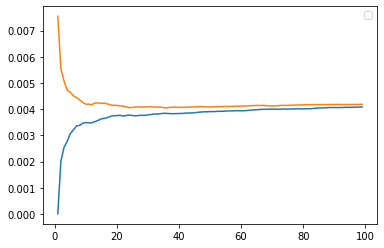

In [60]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

test_mses, ks, train_mses = [], range(1, 100), []

pre_pro = [(StandardScaler(), ['GS']), (StandardScaler(), ['MP_diff']), 
             (StandardScaler(), ["PTS_diff"]), (StandardScaler(), ["PTS"]), (StandardScaler(), ["AST_diff"])]

col_trans = make_column_transformer(*pre_pro)

for k in ks:
  pipeline = make_pipeline(col_trans,
                           KNeighborsRegressor(n_neighbors=k,
                                               metric="euclidean"))
  test_mses.append(-1 * cross_val_score(pipeline, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10).mean())
  pipeline.fit(X=X_train, y=y_train)
  y_train_ = pipeline.predict(X_train)
  error = mean_squared_error(y_train, y_train_)
  train_mses.append(error)

plt.plot(ks, train_mses)
plt.plot(ks, test_mses)
plt.legend()
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(
    pipeline,
    param_grid={
        "kneighborsregressor__n_neighbors": range(1, 100),
    },
    scoring="neg_mean_squared_error", cv=10)

grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'kneighborsregressor__n_neighbors': 36}

Best k value seems to be 31

In [62]:
pipeline = make_pipeline(col_trans,
                         KNeighborsRegressor(n_neighbors=31,
                                             metric="euclidean"))
pipeline.fit(X=X_train, y=y_train)
y_pred_ = pipeline.predict(x_test)

y_pred_ = pd.Series(y_pred_)

We will now keep track of this model.

In [63]:
# Keep track of model
models = {
    "Model Name" : [],
    "Validation MSE" : [],
    "Test MSE" : [],
    "Model" : []
}

In [64]:
pre_pro = [(StandardScaler(), ['GS']), (StandardScaler(), ['MP_diff']), 
             (StandardScaler(), ["PTS_diff"]), (StandardScaler(), ["PTS"]), (StandardScaler(), ["AST_diff"])]

best_knearest = make_pipeline(make_column_transformer(*pre_pro),
                         KNeighborsRegressor(n_neighbors=31,
                                             metric="manhattan")) 

val_score = -1 * cross_val_score(pipeline, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10).mean()

test_score = mean_squared_error(y_test, y_pred_)


models['Model Name'].append('KNearestNeighbors')
models['Validation MSE'].append(val_score)
models['Test MSE'].append(test_score)
models['Model'].append(best_knearest)

####**Linear**

In [65]:
from sklearn.linear_model import LinearRegression

quant = ['GS', 'MP_diff', 'MP', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff', 'TRB', 'STL_diff', 'BLK_diff', 'Share']
df_all[quant] = df_all[quant].astype(float)

train = df_all[df_all["year"] < 2018]
test = df_all[(df_all["year"] >= 2018) & (df_all["year"] < 2023)]

X_train = train[['GS', 'MP_diff', 'MP', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff', 'TRB', 'STL_diff',
                 'BLK_diff']]
y_train = train["Share"]

x_test = test[['GS', 'MP_diff', 'MP', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff', 'TRB', 'STL_diff',
                 'BLK_diff']]
y_test = test["Share"]

<ipython-input-65-d8b57c484685>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[quant] = df_all[quant].astype(float)


In [66]:
pre_pro = [(StandardScaler(), ['GS']), (StandardScaler(), ['MP_diff']), (StandardScaler(), ["PTS_diff"]), (StandardScaler(), ["PTS"]),
           (StandardScaler(), ["AST_diff"]), (StandardScaler(), ["AST"]), (StandardScaler(), ['TRB_diff']), (StandardScaler(), ["TRB"]),
           (StandardScaler(), ['STL_diff']),(StandardScaler(), ['BLK_diff'])]

model = LinearRegression()

for value in range(1, len(pre_pro) + 1):
  pipeline = make_pipeline(make_column_transformer(*pre_pro[:value]),
                           model)
  pipeline.fit(X=X_train, y=y_train)

  print(-cross_val_score(pipeline, X_train, y_train, 
                        scoring="neg_mean_squared_error", cv = 10).mean())

0.005153966105164891
0.004641897006851638
0.004446337637019039
0.004448133634873938
0.004432516727244498
0.004433671716191573
0.004420483173394992
0.00442434716538061
0.004428049461706346
0.004434638956622648


The best features seem to be Games Started, Minutes Player Difference, Points Scored Difference, Points Scored, Assists Difference, Assists, Total Rebounds Difference.

We will now perform content filtering.

In [67]:
df_all['GS'] = df_all['GS'].astype(float)
df_all['PTS'] = df_all['PTS'].astype(float)
df_all['AST'] = df_all['AST'].astype(float)

df_all = df_all[(df_all['GS'] > 49) & (df_all['PTS'] > 12.1) & (df_all['AST'] > 1.5)]

train = df_all[df_all["year"] < 2018]
test = df_all[(df_all["year"] >= 2018) & (df_all["year"] < 2023)]

<ipython-input-67-2689e0bd4212>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['GS'] = df_all['GS'].astype(float)
<ipython-input-67-2689e0bd4212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['PTS'] = df_all['PTS'].astype(float)
<ipython-input-67-2689e0bd4212>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [68]:
train

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff,Nominee,Share
0,Kareem Abdul-Jabbar,38,79,79.0,33.3,9.6,16.9,.564,0.0,0.0,...,-1.4,-1.8,0.3,0.0,-0.5,0.1,0.1,1.4,False,0.000
2,Mark Aguirre,26,74,73.0,33.8,9.0,17.9,.503,0.2,0.8,...,0.0,0.0,1.5,0.0,-0.1,0.2,0.0,-3.1,False,0.000
11,Charles Barkley,22,80,80.0,36.9,7.4,13.0,.572,0.2,0.9,...,3.1,4.2,2.0,1.0,0.6,1.9,0.5,6.0,True,0.237
13,Larry Bird,29,82,81.0,38.0,9.7,19.6,.496,1.0,2.4,...,-1.0,-0.7,0.2,0.4,-0.6,0.1,-0.4,-2.9,False,0.000
14,Otis Birdsong,30,77,74.0,31.1,7.0,13.7,.513,0.1,0.3,...,-0.1,0.0,-0.7,-0.4,0.1,0.2,0.4,-4.8,False,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,Dwyane Wade,35,60,59.0,29.9,6.9,15.9,.434,0.8,2.4,...,0.5,0.4,-0.8,0.3,0.1,-0.4,0.3,-0.7,False,0.000
10872,Kemba Walker,26,79,79.0,34.7,8.1,18.3,.444,3.0,7.6,...,-0.4,-0.5,0.3,-0.5,-0.2,0.0,0.1,2.3,False,0.000
10873,John Wall,26,78,78.0,36.4,8.3,18.4,.451,1.1,3.5,...,-1.0,-0.7,0.5,0.1,-0.2,0.0,-0.2,3.2,True,0.002
10878,Russell Westbrook,28,81,81.0,34.6,10.2,24.0,.425,2.5,7.2,...,3.0,2.9,0.0,-0.4,0.1,1.1,-0.2,8.1,False,0.000


In [69]:
test

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,PTS_diff,Nominee,Share
10904,LaMarcus Aldridge,32,75,75.0,33.5,9.2,18.0,.510,0.4,1.2,...,0.3,1.2,0.1,0.0,0.0,0.1,-0.1,5.8,False,0.000
10910,Giannis Antetokounmpo,23,75,75.0,36.7,9.9,18.7,.529,0.6,1.9,...,1.0,1.2,-0.6,-0.1,-0.5,0.1,0.0,4.0,True,0.014
10920,Harrison Barnes,25,77,77.0,34.2,7.0,15.7,.445,1.5,4.3,...,1.3,1.1,0.5,-0.2,0.0,0.2,-0.4,-0.3,False,0.000
10925,Kent Bazemore,28,65,65.0,27.5,4.4,10.4,.420,1.7,4.2,...,0.9,0.6,1.1,0.3,0.0,0.7,0.0,1.9,False,0.000
10926,Bradley Beal,24,82,82.0,36.3,8.3,18.1,.460,2.4,6.5,...,1.3,1.3,1.0,0.1,0.1,0.6,-0.2,-0.5,False,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12967,Russell Westbrook,33,78,78.0,34.3,7.0,15.8,.444,1.0,3.4,...,-3.9,-4.1,-4.6,-0.4,-0.1,-1.0,0.1,-3.7,False,0.000
12969,Derrick White,27,75,52.0,29.3,4.5,10.7,.421,1.5,4.9,...,0.4,0.5,1.4,0.2,-0.2,0.3,-0.2,-2.2,False,0.000
12971,Andrew Wiggins,26,73,73.0,31.9,6.5,14.0,.466,2.2,5.5,...,-0.4,-0.4,-0.2,0.1,-0.3,-0.3,0.0,-1.4,False,0.000
12981,Christian Wood,26,68,67.0,30.8,6.5,12.9,.501,1.9,4.9,...,0.7,0.5,0.6,0.0,-0.2,-0.1,0.4,-3.1,False,0.000


We will now test different scalers

In [71]:
scalers = [StandardScaler(), Normalizer(), MinMaxScaler()]

X_train = train[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff']]
x_test = test[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff', "AST", 'TRB_diff']]
y_train = train["Share"]
y_test = test["Share"]


for scaler in scalers:

  pre_pro = [(scaler, ['GS']), (scaler, ['MP_diff']), 
             (scaler, ["PTS_diff"]), (scaler, ["PTS"]), (scaler, ["AST_diff"]),
             (scaler, ["AST"]), (scaler, ["TRB_diff"])]


  pipeline = make_pipeline(make_column_transformer(*pre_pro),
                             LinearRegression())
  
  pipeline.fit(X=X_train, y=y_train)
    
  print(scaler, -1 * cross_val_score(pipeline, X_train, y_train,
                              scoring="neg_mean_squared_error", cv=10).mean())

StandardScaler() 0.0044735211638103995
Normalizer() 0.005009518666059294
MinMaxScaler() 0.0044735211638104


The best scaler is Standard Scaler and MinMax. We will use Standard Scaler.

In [72]:
scalers = [StandardScaler()]

X_train = train[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff']]
x_test = test[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff', "AST", 'TRB_diff']]

for scaler in scalers:

  pre_pro = [(scaler, ['GS']), (scaler, ['MP_diff']), 
             (scaler, ["PTS_diff"]), (scaler, ["PTS_diff"]), (scaler, ["AST_diff"]),
             (scaler, ["AST"]), (scaler, ["TRB_diff"])]


  pipeline = make_pipeline(make_column_transformer(*pre_pro),
                             LinearRegression())
  
  pipeline.fit(X=X_train, y=y_train)
  y_pred_ = pipeline.predict(x_test)

  y_pred_ = pd.Series(y_pred_)

y_pred_

0      0.050720
1      0.034880
2      0.013868
3      0.025649
4      0.017291
         ...   
340   -0.065498
341   -0.002702
342   -0.006292
343   -0.009214
344    0.026525
Length: 345, dtype: float64

We will now save this model.

In [73]:
scalers = [StandardScaler()]

X_train = train[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff']]
x_test = test[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff', "AST", 'TRB_diff']]

for scaler in scalers:

  pre_pro = [(scaler, ['GS']), (scaler, ['MP_diff']), 
             (scaler, ["PTS_diff"]), (scaler, ["PTS_diff"]), (scaler, ["AST_diff"]),
             (scaler, ["AST"]), (scaler, ["TRB_diff"])]


  pipeline = make_pipeline(make_column_transformer(*pre_pro),
                             LinearRegression())
  
  pipeline.fit(X=X_train, y=y_train)

  val_score = -1 * cross_val_score(pipeline, X_train, y_train,
                              scoring="neg_mean_squared_error", cv=10).mean()
  
  bestlinear = make_pipeline(make_column_transformer(*pre_pro),
                             LinearRegression())

test_score = mean_squared_error(y_test, y_pred_)



models['Model Name'].append('LinearRegression')
models['Validation MSE'].append(val_score)
models['Test MSE'].append(test_score)
models['Model'].append(bestlinear)


####**Ensemble Models**

We will now see if we can improve upon the two models by ensembling them together.

In [74]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor

#####**Voting**

In [75]:
X_train = train[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff', 'AST', 'TRB_diff']]
x_test = test[['GS', 'MP_diff', 'PTS_diff', 'PTS', 'AST_diff', "AST", 'TRB_diff']]

ensemble_model_vote = VotingRegressor([
    ("knn", models["Model"][0]),
    ("linear", models["Model"][1])
])

cv_errs = -cross_val_score(ensemble_model_vote, 
                            X=X_train,
                            y=y_train,
                            scoring="neg_mean_squared_error", cv=10)

ensemble_vote_mse = cv_errs.mean()

ensemble_model_vote.fit(X=X_train, y=y_train)
y_pred_ = ensemble_model_vote.predict(x_test)
test_score = mean_squared_error(y_test, y_pred_)


In [76]:
models["Model Name"].append("EnsembleModel_Voting")
models["Validation MSE"].append(ensemble_vote_mse)
models['Test MSE'].append(test_score)
models['Model'].append(ensemble_model_vote)

#####**Stacking**

In [77]:
ensemble_model_stack = StackingRegressor([
    ("linear", models["Model"][1]), 
    ("knn", models["Model"][0])],
    final_estimator=LinearRegression()
)

cv_errs = -cross_val_score(ensemble_model_stack, 
                            X=X_train,
                            y=y_train,
                            scoring="neg_mean_squared_error", cv=10)

ensemble_stack_mse = cv_errs.mean()

ensemble_model_stack.fit(X=X_train, y=y_train)
y_pred_ = ensemble_model_stack.predict(x_test)
test_score = mean_squared_error(y_test, y_pred_)

In [78]:
models["Model Name"].append("EnsembleModel_Stacking")
models["Validation MSE"].append(ensemble_stack_mse)
models['Test MSE'].append(test_score)
models['Model'].append(ensemble_model_stack)

In [79]:
used_models = models["Model"]
del models["Model"]
pd.DataFrame(models)

,Model Name,Validation MSE,Test MSE
0,KNearestNeighbors,0.004096,0.010081
1,LinearRegression,0.004471,0.011544
2,EnsembleModel_Voting,0.004125,0.011249
3,EnsembleModel_Stacking,0.003967,0.010929


The stacking model seems to be the best. Lets look at its predictions.

In [80]:
pipeline = used_models[3]
pipeline.fit(X=X_train, y=y_train)
y_pred_ = pipeline.predict(x_test)

y_pred_ = pd.Series(y_pred_)
y_pred_

0      0.018463
1      0.009775
2      0.000455
3      0.001366
4      0.001348
         ...   
340   -0.004065
341   -0.000754
342   -0.000948
343   -0.001106
344    0.007317
Length: 345, dtype: float64

In [81]:
predictions = test[['Player','year']]
index_list = list(range(0, len(predictions.index)))
predictions = predictions.set_axis(index_list, axis='index')
predictions['share'] = y_pred_
predictions[predictions['year'] == 2022].sort_values(by=['share'], ascending= False)[:10]

,Player,year,share
315,Tyrese Maxey,2022,0.200121
280,Miles Bridges,2022,0.177399
272,Desmond Bane,2022,0.105232
308,Reggie Jackson,2022,0.087435
322,Dejounte Murray,2022,0.057125
290,DeMar DeRozan,2022,0.048346
326,Jordan Poole,2022,0.048208
276,Saddiq Bey,2022,0.038846
319,Ja Morant,2022,0.038227
325,Jakob Poeltl,2022,0.035859


In [82]:
predictions[predictions['year'] == 2021].sort_values(by=['share'], ascending= False)[:10]

,Player,year,share
237,Nikola Jokić,2021,0.103518
228,Jerami Grant,2021,0.076916
265,Zion Williamson,2021,0.057540
248,Julius Randle,2021,0.056131
219,Stephen Curry,2021,0.048926
207,Darius Bazley,2021,0.035315
224,De'Aaron Fox,2021,0.034162
223,Joel Embiid,2021,0.029472
215,Jaylen Brown,2021,0.028247
256,Jayson Tatum,2021,0.028023


In [83]:
predictions[predictions['year'] == 2020].sort_values(by=['share'], ascending= False)[:10]

,Player,year,share
164,Devonte' Graham,2020,0.247242
171,Brandon Ingram,2020,0.120525
192,Jayson Tatum,2020,0.108173
199,Trae Young,2020,0.105391
153,Jaylen Brown,2020,0.102481
162,Shai Gilgeous-Alexander,2020,0.098867
190,Pascal Siakam,2020,0.097726
152,Dillon Brooks,2020,0.093184
186,Terry Rozier,2020,0.085191
141,Bam Adebayo,2020,0.076825


* 8/10 of the player predicting by our model were in the top 15 of nba voters.
* The only players not in the voting were Dillon Brooks and Terry Rozier
* Terry Rozier is now averaging nearly 22ppg with the Hornets.
* Dillon Brooks is a quality starter for the grizzlies on an extremely team friendly deal of 12 million per year
* Devonte Graham wins the award over Brandon Ingram. Graham missing out on the award was considered one of the greatest robberies of the MIP award.

In [84]:
predictions[predictions['year'] == 2019].sort_values(by=['share'], ascending= False)[:10]

,Player,year,share
122,Cedi Osman,2019,0.191878
101,Buddy Hield,2019,0.150585
80,John Collins,2019,0.146056
112,Kawhi Leonard,2019,0.141967
128,Pascal Siakam,2019,0.134662
88,De'Aaron Fox,2019,0.123029
127,D'Angelo Russell,2019,0.098232
92,Paul George,2019,0.077590
111,Zach LaVine,2019,0.072873
89,Danilo Gallinari,2019,0.053577


In [85]:
predictions[predictions['year'] == 2018].sort_values(by=['share'], ascending= False)[:10]

,Player,year,share
54,Taurean Prince,2018,0.115217
50,Victor Oladipo,2018,0.087832
46,Khris Middleton,2018,0.067875
48,Jamal Murray,2018,0.066558
7,Jaylen Brown,2018,0.058164
36,Brandon Ingram,2018,0.035160
18,Spencer Dinwiddie,2018,0.034749
22,Joel Embiid,2018,0.028335
21,Kevin Durant,2018,0.026121
26,Aaron Gordon,2018,0.023343


#**Conclusion**

Overall, we are extremely pleased with the performance of our model. It not only provides a solid criteria that the MIP currently doesn't have, but also factors in possible narratives, etc. by focusing in on stats that pass the "eye test".

Just for fun, we will try to predict the winner for 2023 based off of current stats right now

In [86]:
test = df_all[(df_all["year"] == 2023)]

In [87]:
y_pred_ = pipeline.predict(test)
y_pred_ = pd.Series(y_pred_)


In [88]:
predictions = test[['Player','year']]
index_list = list(range(0, len(predictions.index)))
predictions = predictions.set_axis(index_list, axis='index')
predictions['share'] = y_pred_
predictions[predictions['year'] == 2023].sort_values(by=['share'], ascending= False)[:10]

,Player,year,share
47,Lauri Markkanen,2023,0.127050
13,Jalen Brunson,2023,0.117848
32,Jalen Green,2023,0.064169
15,Jordan Clarkson,2023,0.056319
33,Tyrese Haliburton,2023,0.056218
43,Tre Jones,2023,0.050067
58,Julius Randle,2023,0.043384
46,Damian Lillard,2023,0.042820
28,Shai Gilgeous-Alexander,2023,0.042018
41,Keldon Johnson,2023,0.041672


* Our model shows that Markkanen will the award among him, Brunson, and Green
* Sportsbooks have him also winning among him, Gilgeous-Alexander, and Brunson
* Our Model considers the narrative but also puts more weight on true improvement.


Here are the Vegas betting odds for MIP this season:

* Lauri Markennen(+115)
* Shai Gilgeous-Alexander(+116)
* Jalen Brunson(+275)
* Tyrese Haliburton(+4000)


As you can see our model is quite accurate in attempting to predict the voteshares and the winner of the MIP awards. 